In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv("AssignmentDataSet.csv")
data=data.drop("index",axis=1)
processed_data=data

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_nbr               5000 non-null   int64  
 1   race                      5000 non-null   object 
 2   gender                    5000 non-null   object 
 3   age                       5000 non-null   object 
 4   admission_type_id         5000 non-null   int64  
 5   discharge_disposition_id  5000 non-null   int64  
 6   admission_source_id       5000 non-null   int64  
 7   time_in_hospital          5000 non-null   int64  
 8   num_lab_procedures        5000 non-null   int64  
 9   num_procedures            5000 non-null   int64  
 10  num_medications           5000 non-null   int64  
 11  number_outpatient         5000 non-null   int64  
 12  number_emergency          5000 non-null   int64  
 13  number_inpatient          5000 non-null   int64  
 14  diag_1  

In [3]:
data.describe(include="object")

,race,gender,age,chlorpropamide,glimepiride,acetohexamide,glyburide,tolbutamide,pioglitazone,rosiglitazone,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,6,2,10,3,4,1,4,2,4,4,...,2,1,2,4,4,2,1,2,2,2
top,Caucasian,Female,[70-80),No,No,No,No,?,No,No,...,No,No,Steady,No,No,No,No,No,Yes,NO
freq,3759,2701,1241,4997,4738,5000,4454,3993,4653,4679,...,4999,5000,3457,2329,4967,4999,5000,2692,3860,2718


In [4]:
data.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,number_diagnoses
count,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.422552e+07,2.03220,3.700400,5.704000,4.430400,43.195200,1.360400,15.904600,0.417600,0.187200,0.638000,482.745440,439.625244,414.914594,439.815457,7.395000
std,3.849572e+07,1.45643,5.265148,3.951393,3.009612,19.761316,1.711227,8.117406,1.476227,0.755957,1.244374,209.822249,189.521997,199.994923,213.940968,1.925647
min,5.220000e+03,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,8.000000,8.000000,5.151678,1.000000
25%,2.340186e+07,1.00000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,403.000000,276.000000,250.920000,287.300363,6.000000
50%,4.534128e+07,1.00000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,435.000000,426.000000,403.000000,409.086176,8.000000
75%,8.722371e+07,3.00000,3.250000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,590.000000,560.000000,511.000000,552.748089,9.000000
max,1.892989e+08,8.00000,28.000000,20.000000,14.000000,108.000000,6.000000,65.000000,39.000000,22.000000,15.000000,999.000000,999.000000,998.000000,1509.286492,16.000000


In [5]:
index=list(processed_data.columns)

for i in index:
    print(i,": ",data[i].unique(),end=" | ")
    print("Number of different values: ",len(data[i].unique()))
    print("----------------------------------------------------------------------------------------------------------")

patient_nbr :  [ 41186889  83591073  68337009 ... 101621745  21969333  41306418] | Number of different values:  4837
----------------------------------------------------------------------------------------------------------
race :  ['Caucasian' 'Other' 'Hispanic' 'AfricanAmerican' '?' 'Asian'] | Number of different values:  6
----------------------------------------------------------------------------------------------------------
gender :  ['Female' 'Male'] | Number of different values:  2
----------------------------------------------------------------------------------------------------------
age :  ['[80-90)' '[60-70)' '[40-50)' '[70-80)' '[50-60)' '[30-40)' '[20-30)'
 '[90-100)' '[10-20)' '[0-10)'] | Number of different values:  10
----------------------------------------------------------------------------------------------------------
admission_type_id :  [1 6 2 3 5 8 7] | Number of different values:  7
----------------------------------------------------------------------------

# Data preprocesation

A preliminary analysis of the dataset reveals some issues with the features:


    -Race and gender: These features contain missing values. Conseqently, rows with missin values will be removed.
    
    -Metformin-rosiglitazone, examide, troglitazone, acetohexamide, tolbutamide: These features contain one value. Since we are interested in classifying the data, columns with only one unique value, don't provide any useful information for the classification task. Therefore, these columns will be removed.

    -Diagnoses 4: This feature present a unique value for each entry, with more than two decimals places. However, each entry should correspond to a disease code from https://www.icd9data.com/2015/Volume1/default.htm, where each of codes have less than two decimals. Therefore, the information of this feature doesn't have interpretation, and can be safely removed.


This analysis has been performed to identify those features that are irrelevant to the classification process. These featured were removed to simplify the dataset for the classification task.




In [6]:
processed_data=processed_data.drop(["acetohexamide","examide","troglitazone","metformin-rosiglitazone","tolbutamide","diag_4"],axis=1)

processed_data.replace('?', np.nan, inplace=True)  # Reemplaza '?' por NaN
processed_data = processed_data.dropna() 

Now, I will use the column of patient_nbr to check if there are more than one row that correspond with the same patient.

[4573  147    7]


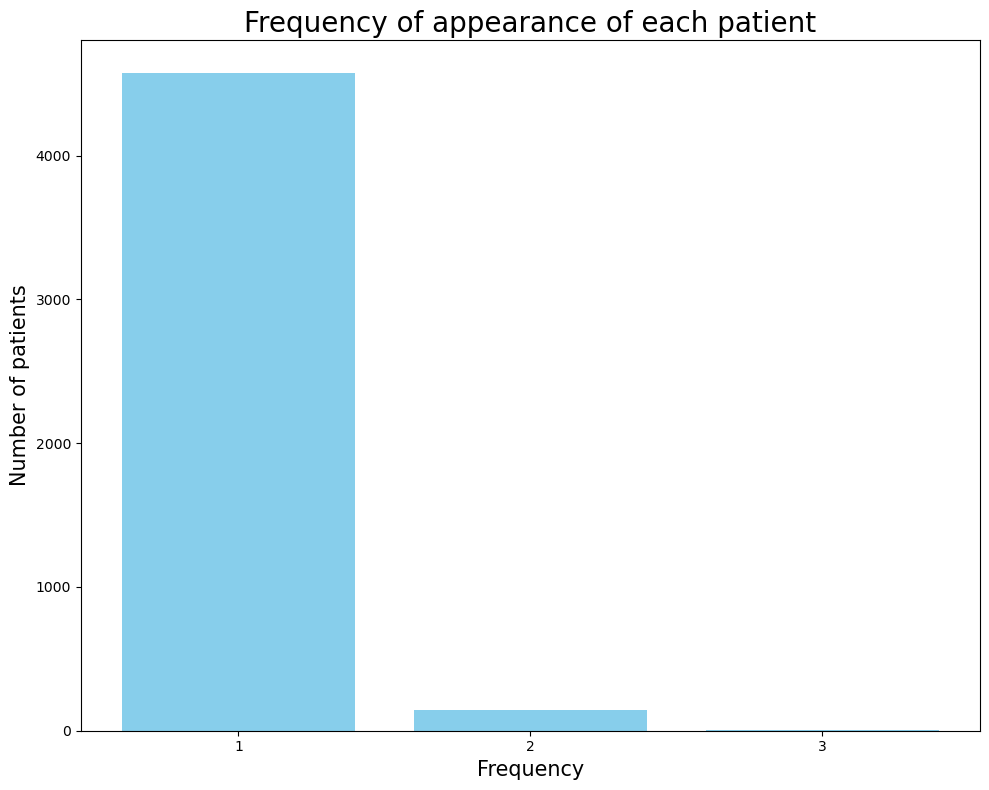

In [7]:
patient_repeated=processed_data["patient_nbr"].value_counts()

patient_repeated

rep,axis=np.histogram(patient_repeated.to_numpy(),bins=3)

print(rep)

plt.figure(1,figsize=(10,8))
plt.title("Frequency of appearance of each patient",fontsize=20)
plt.xticks([1,2,3])
plt.xlabel("Frequency",fontsize=15)
plt.ylabel("Number of patients",fontsize=15)
plt.bar([1,2,3],rep, color='skyblue')
plt.tight_layout()
plt.savefig("frequecy_of_each_patient.png",format="png",bbox_inches="tight")

This result shows that there are some rows that correspond with the same patient, but the number of the repetition is not to high since the higher repetition is just 3. To avoid biases in the data, all the rows that correspond with the same patient are removed and I will keep only the first apperance in the database.

In [8]:
processed_data.drop_duplicates(["patient_nbr"],keep="first",inplace=True)

Finally, since the patient_nbr is just an id assigned from the hospital to each patient, it will not have any relevance in the data classification. Therefore, that column can be removed

In [9]:
processed_data=processed_data.drop(["patient_nbr"],axis=1)

The database presente nominal data which cannot be used in algorithms like SVM or RF. Therefore, all the data is mapped to numeric values:

**readmitted, diabetesMed**

The column has as values:

    - Yes=1
    - No=0

**gender**

The column has as values:

    - Female=0
    - Male=1

**change**

The column has as values:

    - No=0
    - Ch=1

**glipizide-metformin,glyburide-metformin,insulin,citoglipton,tolazamide,rosiglitazone,pioglitazone,rosiglitazone,glyburide,chlorpropamide,glimepiride,glipizide-metformin, citoglipton, tolazamide**:

The column has as values:

    - No=0
    - Steady=3
    - Up=1
    - Down=2


**race**:

The column has as values:
    
    - Caucasian=0
    - Other=1
    - Hispanic=4
    - AfricanAmerican=3
    - Asian=5

    

In [10]:
processed_data.loc[:,["readmitted","diabetesMed"]]=processed_data.loc[:,["readmitted","diabetesMed"]].replace("YES","1").replace("NO","0").replace("Yes","1").replace("No","0")
processed_data["gender"]=processed_data["gender"].replace("Male","1").replace("Female","0")
processed_data["change"]=processed_data["change"].replace("Ch","1").replace("No","0")
processed_data["race"]=processed_data["race"].replace("Caucasian","0").replace("Other","1").replace("AfricanAmerican","3").replace("Hispanic","4").replace("Asian","5")
processed_data.loc[:,["glipizide-metformin", "citoglipton", "tolazamide","glyburide-metformin","insulin","rosiglitazone","pioglitazone","glyburide","chlorpropamide","glimepiride"]]=processed_data.loc[:,["glipizide-metformin", "citoglipton", "tolazamide","glyburide-metformin","insulin","rosiglitazone","pioglitazone","glyburide","chlorpropamide","glimepiride"]].replace("Steady","3").replace("No","0").replace("Up","1").replace("Down","2")

There is another nominal value which corresponde with the age, that is given in a format:

\begin{equation}
                \text{Age}=[10x,10(x+1)[\text{ with }x\in{0,1,2,3,4,5,6,7,8,9}
\end{equation}

To convert this data to numerical values, I will assign to each interval the value of the age of the begining of the interval (10x)

In [11]:
def f(x):
    return x[1:2]

for i in processed_data.index:
    processed_data.loc[i,"age"]=f(processed_data.loc[i,"age"])

Finally, while the diagnoses are already in numerical format, each entry represent a disease code from http://www.icd9data.com/2015/Volume1/default.htm. These codes differs even when they refers to conditions that affect the same part of the body. Therefore, codes will be grouped into seven different categories, following the classification outlined in the table 2 from:

Strack, B., DeShazo, J. P., Gennings, C., Olmo, J. L., Ventura, S., Cios, K. J., & Clore, J. N. (2014). Impact of HbA1c measurement on hospital readmission rates: analysis of 70,000 clinical database patient records. BioMed Research International, 2014, 781670. https://doi.org/10.1155/2014/781670

A unique numerical value will be assigned to category as follow:


The number that will be assigned to each of the clases is:

    - Circulatory: 0
    - Respiratory: 1
    - Digestive: 2
    - Diabetes: 3
    - Injury: 4
    - Musculoskeletal: 5
    - Genitourinary: 6
    - Neoplasms: 7
    - Other: 8


In [12]:
diagnosticos=["diag_1","diag_2","diag_3"]

for i in diagnosticos:
    for j in processed_data[i].index:

        processed_data.loc[j,i]=7 if (processed_data.loc[j,i]>=140 and processed_data.loc[j,i]<=239 and processed_data.loc[j,i]!=250) else processed_data.loc[j,i]
        processed_data.loc[j,i]=8 if (processed_data.loc[j,i]>=790 and processed_data.loc[j,i]<=799) else processed_data.loc[j,i]
        processed_data.loc[j,i]=8 if (processed_data.loc[j,i]>=680 and processed_data.loc[j,i]<=709) or processed_data.loc[j,i]==782  or processed_data.loc[j,i]==783  or processed_data.loc[j,i]==789 else processed_data.loc[j,i]
        processed_data.loc[j,i]=8 if (processed_data.loc[j,i]>=1 and processed_data.loc[j,i]<=139 and processed_data.loc[j,i]!=250) or processed_data.loc[j,i]==780 or processed_data.loc[j,i]==781 or processed_data.loc[j,i]==784 else processed_data.loc[j,i]
        processed_data.loc[j,i]=8 if (processed_data.loc[j,i]>=240 and processed_data.loc[j,i]<=279 and processed_data.loc[j,i]!=250) else processed_data.loc[j,i]

        
        processed_data.loc[j,i]=0 if (processed_data.loc[j,i]>=390 and processed_data.loc[j,i]<=459) or processed_data.loc[j,i]==785 else processed_data.loc[j,i]
        
        processed_data.loc[j,i]=1 if (processed_data.loc[j,i]>=460 and processed_data.loc[j,i]<=519) or processed_data.loc[j,i]==786 else processed_data.loc[j,i]
        
        processed_data.loc[j,i]=2 if (processed_data.loc[j,i]>=520 and processed_data.loc[j,i]<=579) or processed_data.loc[j,i]==787 else processed_data.loc[j,i]
        
        processed_data.loc[j,i]=3 if (processed_data.loc[j,i]>=250 and processed_data.loc[j,i]<251) else processed_data.loc[j,i]
        
        processed_data.loc[j,i]=4 if (processed_data.loc[j,i]>=800 and processed_data.loc[j,i]<=999) else processed_data.loc[j,i]
        
        processed_data.loc[j,i]=5 if (processed_data.loc[j,i]>=710 and processed_data.loc[j,i]<=739) else processed_data.loc[j,i]
        
        processed_data.loc[j,i]=6 if (processed_data.loc[j,i]>=580 and processed_data.loc[j,i]<=629) or processed_data.loc[j,i]==788 else processed_data.loc[j,i]
        
        
        processed_data.loc[j,i]=8 if (processed_data.loc[j,i]>=280 and processed_data.loc[j,i]<=389) else processed_data.loc[j,i]
        processed_data.loc[j,i]=8 if (processed_data.loc[j,i]>=630 and processed_data.loc[j,i]<=679) else processed_data.loc[j,i]
        processed_data.loc[j,i]=8 if (processed_data.loc[j,i]>=740 and processed_data.loc[j,i]<=759) else processed_data.loc[j,i]

Finallay, I convert all the data to numbers

In [13]:
processed_data=processed_data.apply(pd.to_numeric,errors="coerce")

In [14]:
index=list(processed_data.columns)

for i in index:
    print(i,": ",processed_data[i].unique())
    print("Number of different values: ",len(data[i].unique()))
    print("----------------------------------------------------------------------------------------------------------")

race :  [0 1 4 3 5]
Number of different values:  6
----------------------------------------------------------------------------------------------------------
gender :  [0 1]
Number of different values:  2
----------------------------------------------------------------------------------------------------------
age :  [8 6 4 7 5 3 2 9 1 0]
Number of different values:  10
----------------------------------------------------------------------------------------------------------
admission_type_id :  [1 6 2 3 5 8 7]
Number of different values:  7
----------------------------------------------------------------------------------------------------------
discharge_disposition_id :  [ 6  1  2 13  3 18 22  8  5  7 14 11 25 24  4 23 28 15  9 10]
Number of different values:  20
----------------------------------------------------------------------------------------------------------
admission_source_id :  [ 7 17  1  5  2  6  4 20  3 11  9]
Number of different values:  11
--------------------------

Now, the data distribution is analyzed to get a better insights of the percentage of entries at each column

In [15]:
index=list(processed_data.columns)

for i in index:
    percentages = processed_data[[i]].apply(lambda col: col.value_counts(normalize=True) * 100)
    print(percentages)
    print("----------------------------------------------------------------------------------------------------------")

           race
race           
0     77.089063
3     18.701079
4      1.903956
1      1.480855
5      0.825048
----------------------------------------------------------------------------------------------------------
           gender
gender           
0       54.008885
1       45.991115
----------------------------------------------------------------------------------------------------------
           age
age           
7    24.836048
6    23.376349
8    17.050984
5    16.585572
4     9.033213
3     3.596361
9     2.792469
2     1.755871
1     0.803893
0     0.169241
----------------------------------------------------------------------------------------------------------
                   admission_type_id
admission_type_id                   
1                          53.056907
3                          18.743389
2                          17.727946
6                           5.648403
5                           4.463719
8                           0.317326
7                  

This results can be represented with a bar graph

/tmp/ipykernel_11615/3244634919.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(cont,figsize=(10,8))


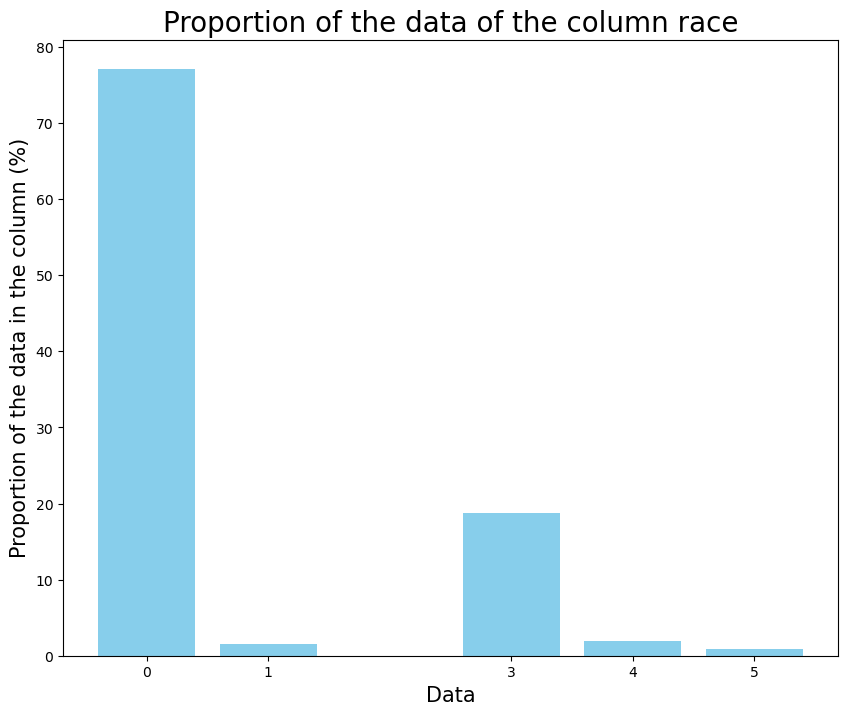

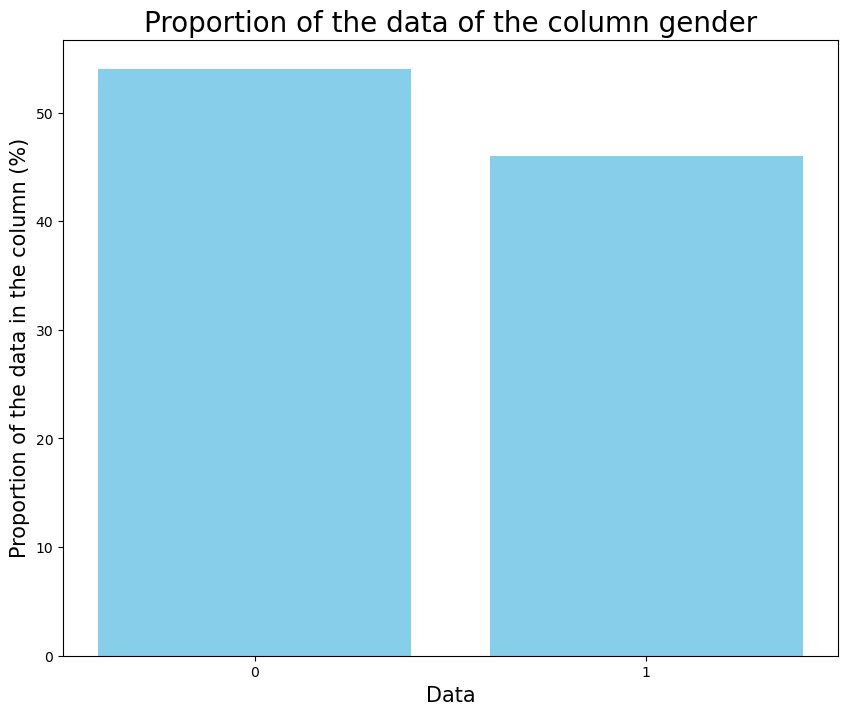

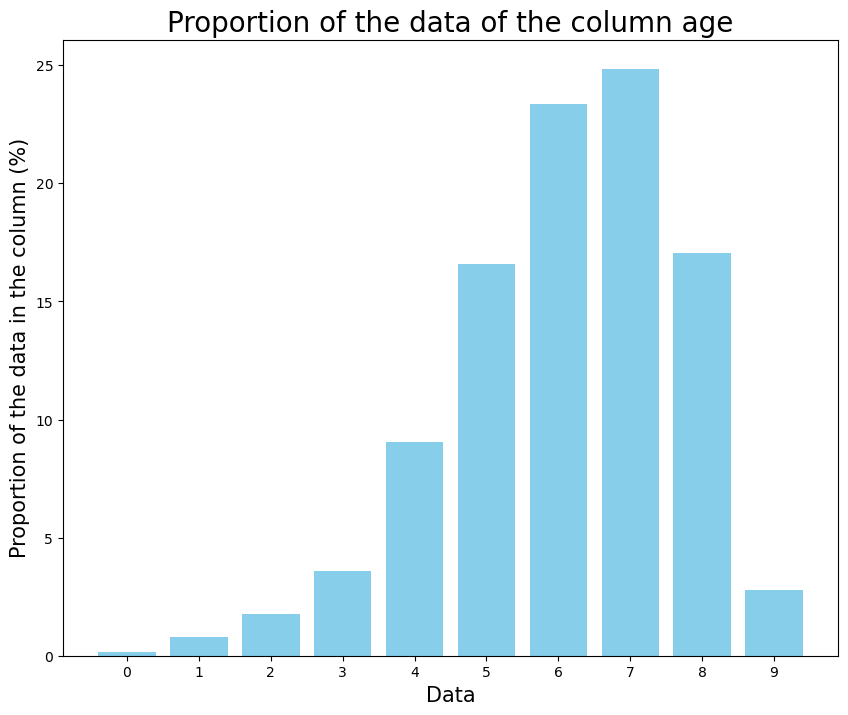

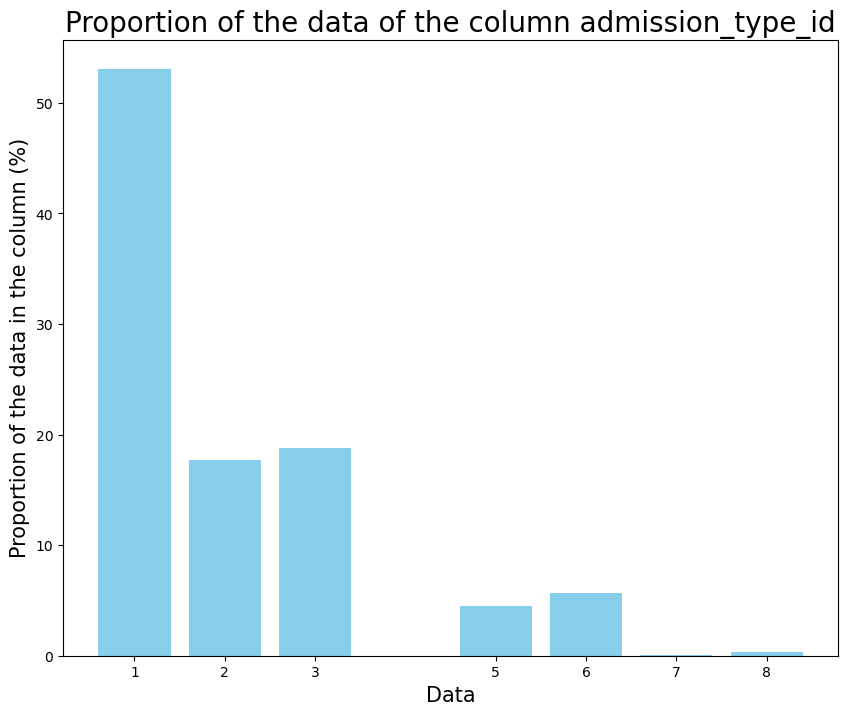

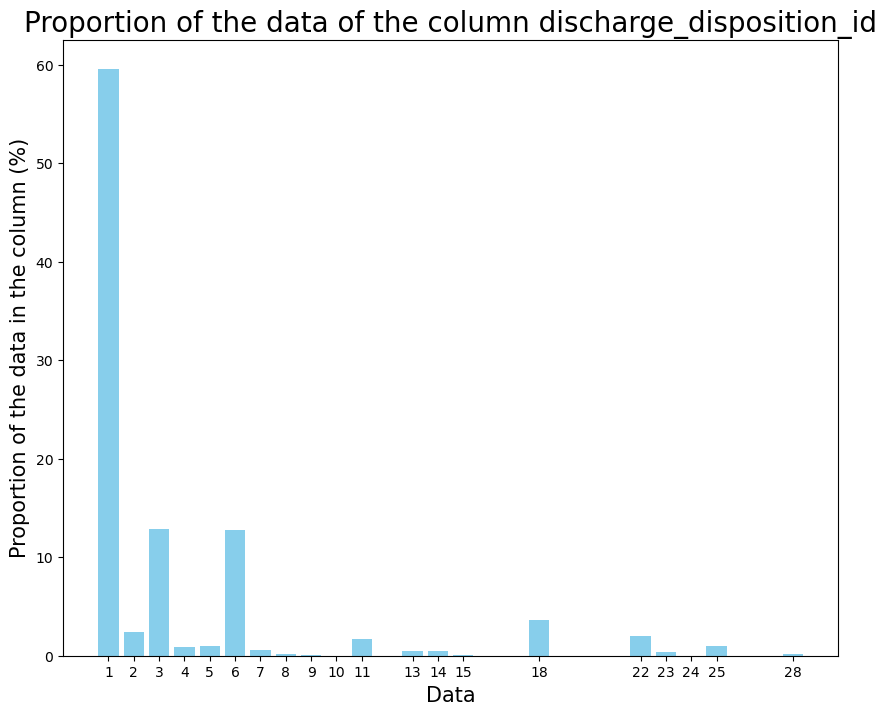

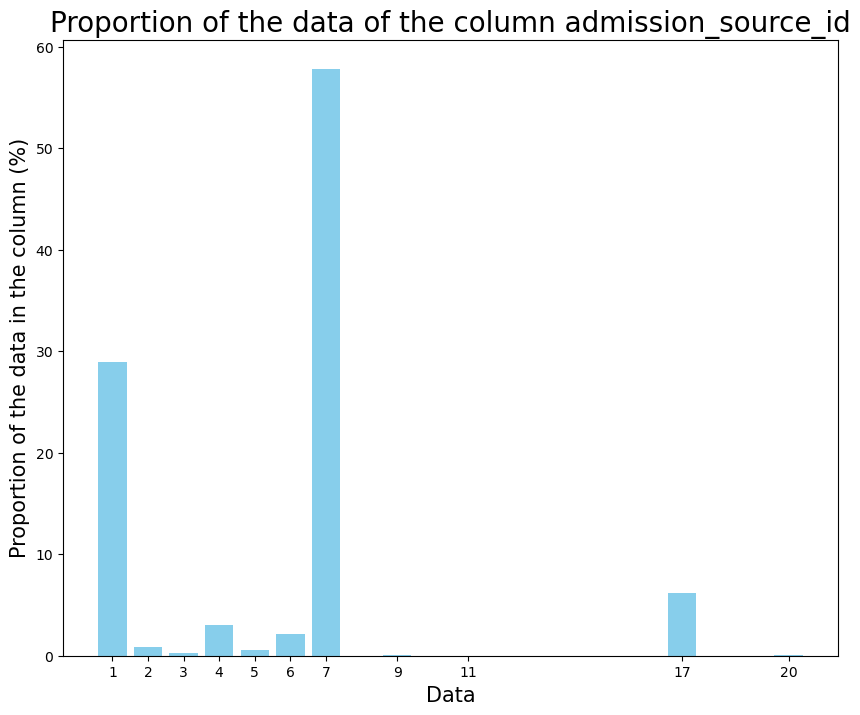

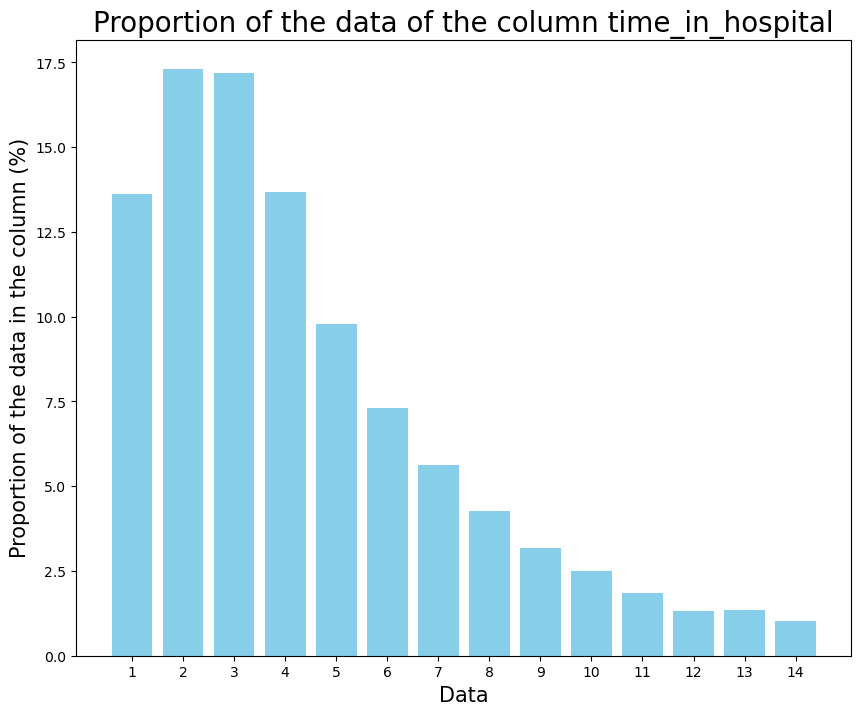

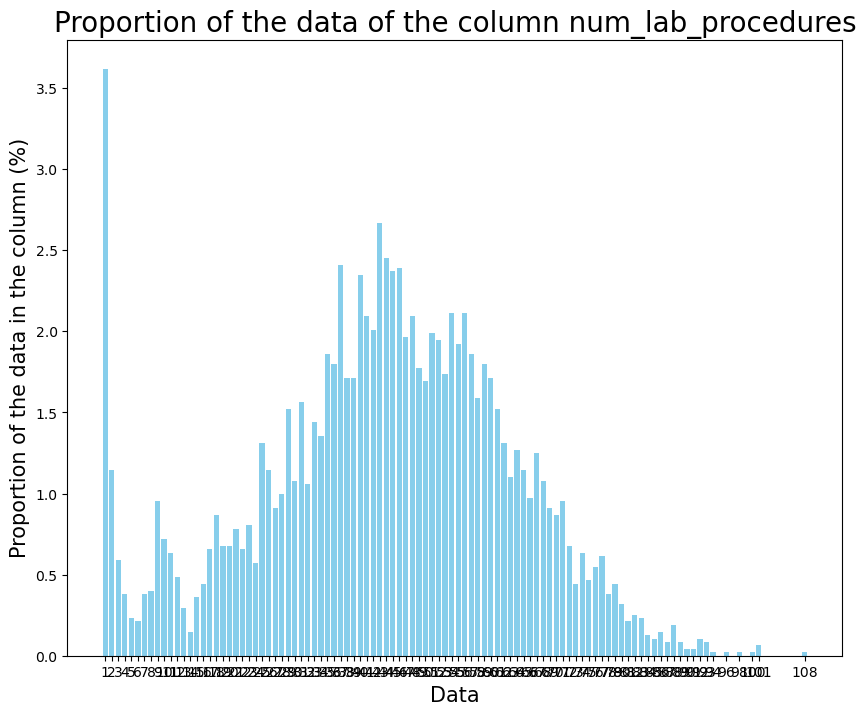

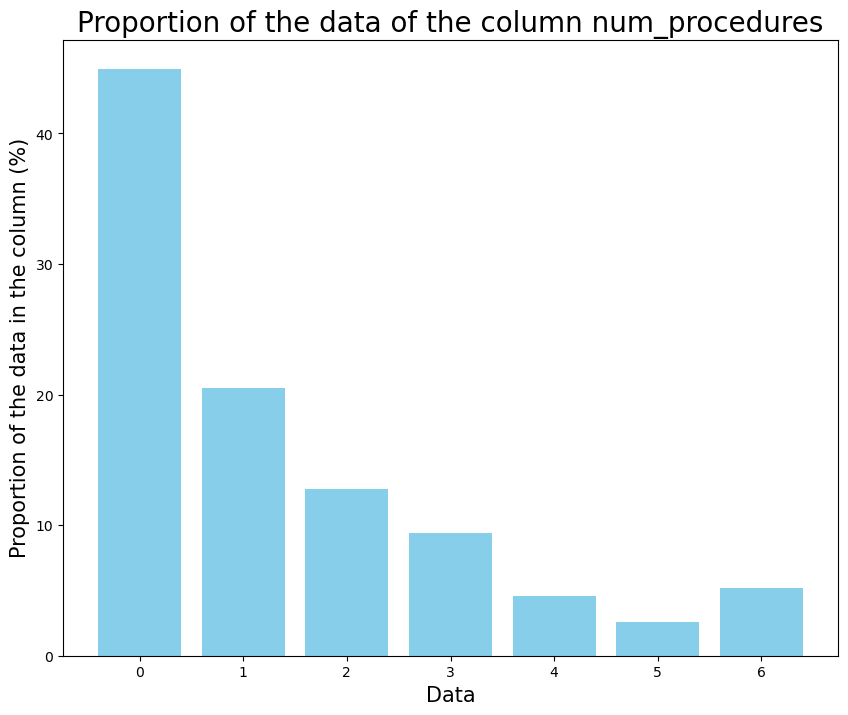

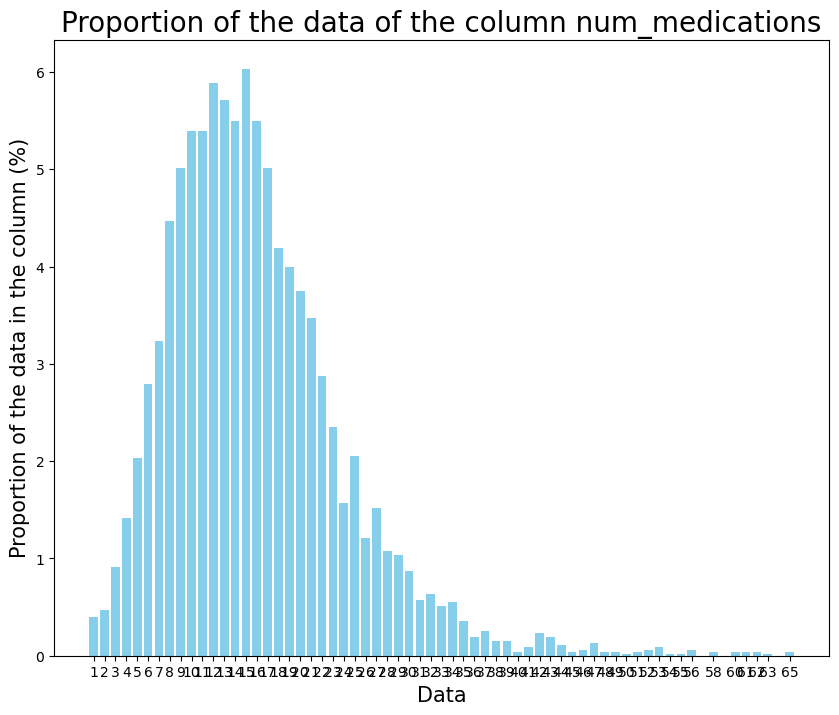

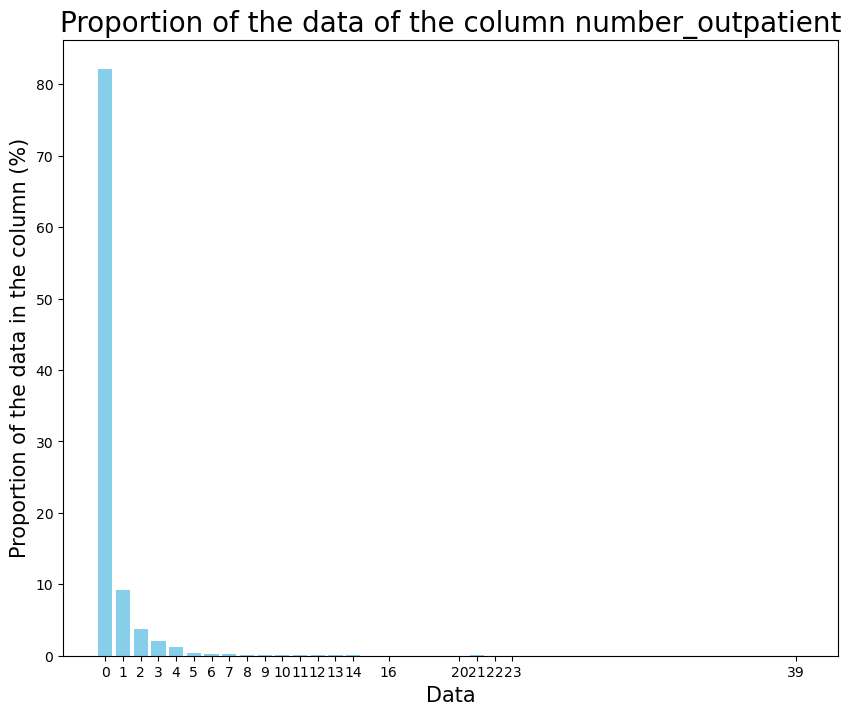

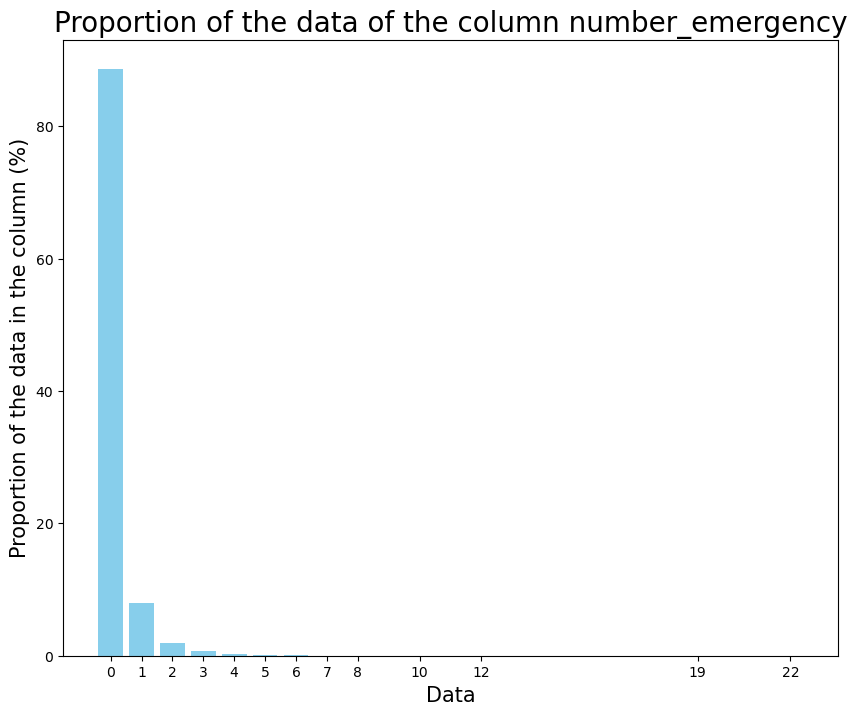

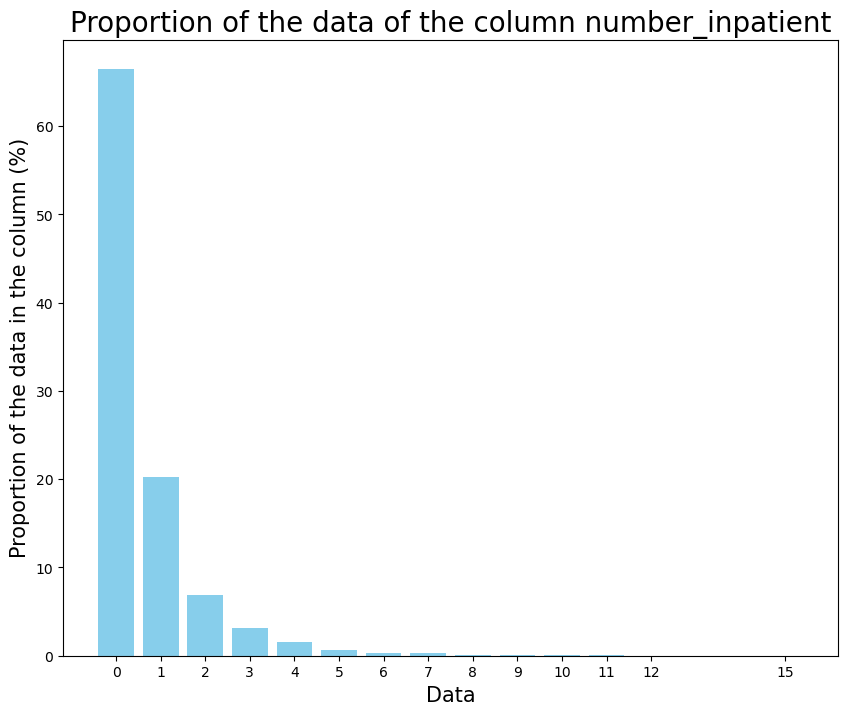

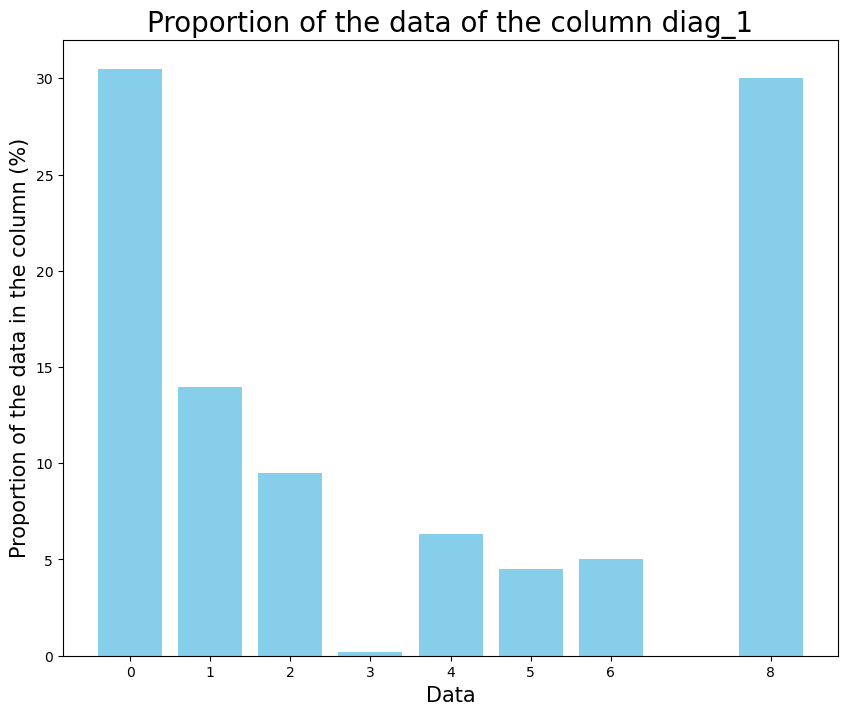

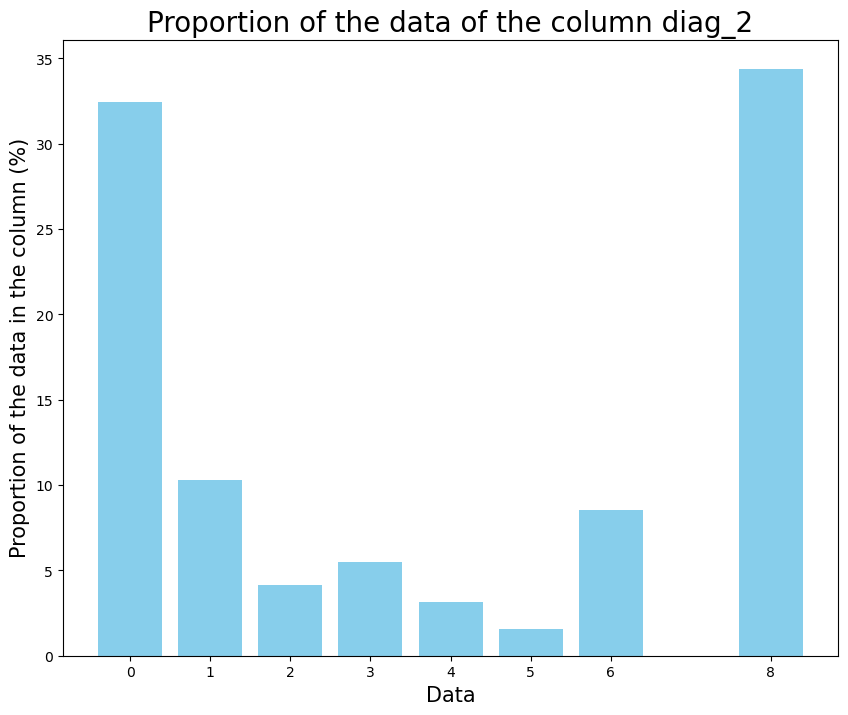

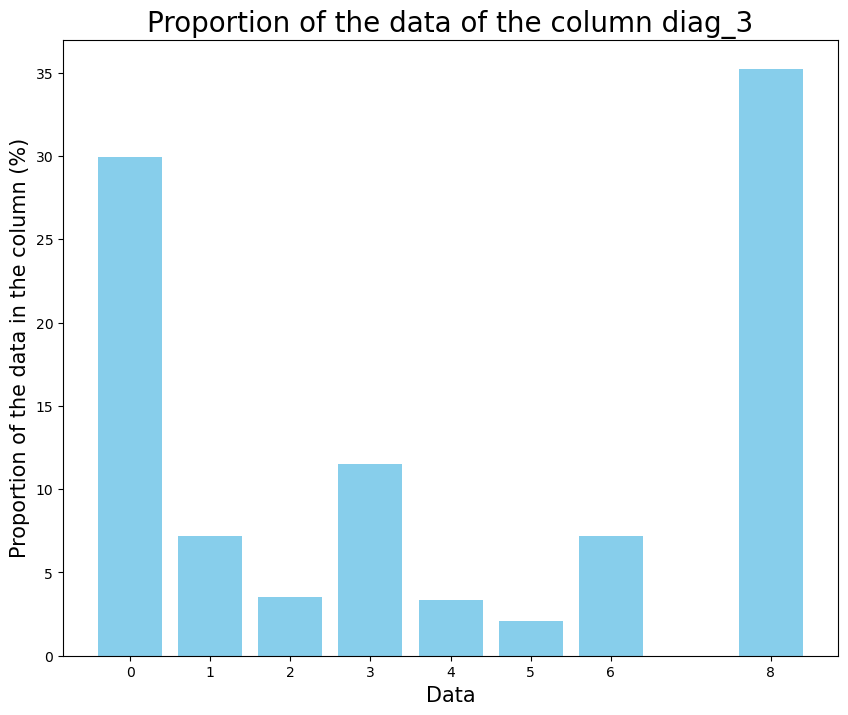

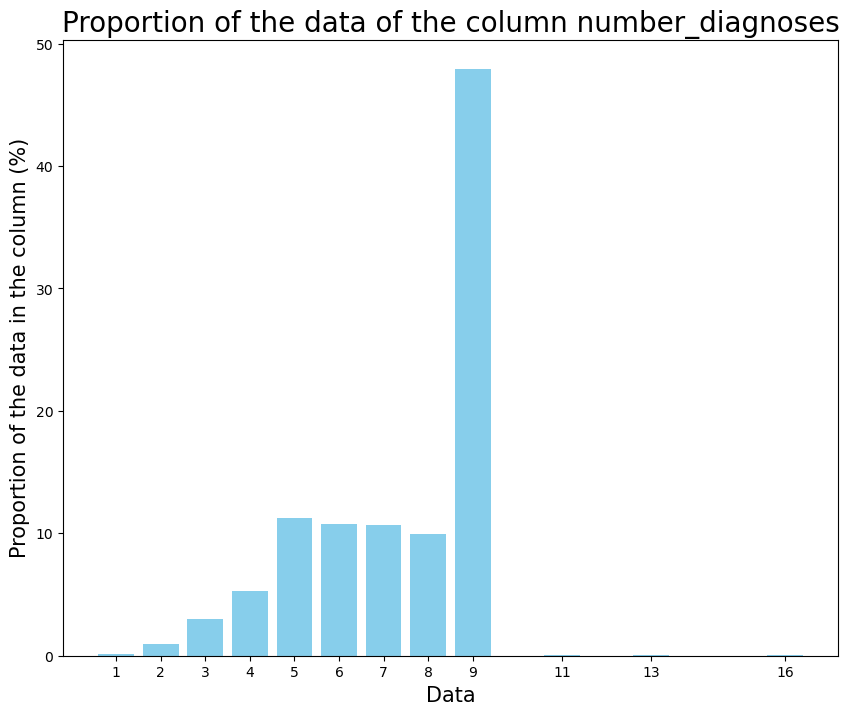

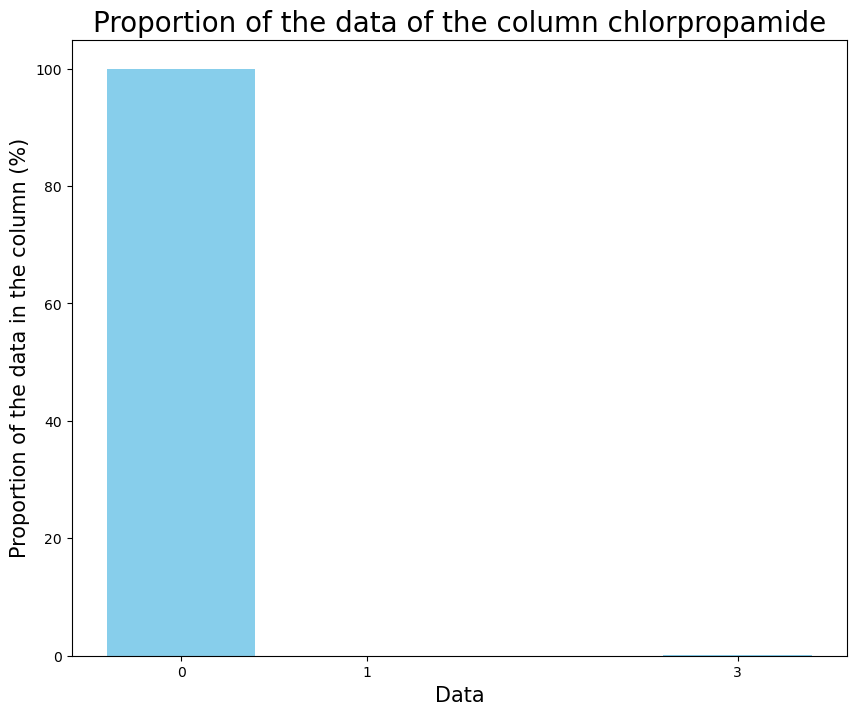

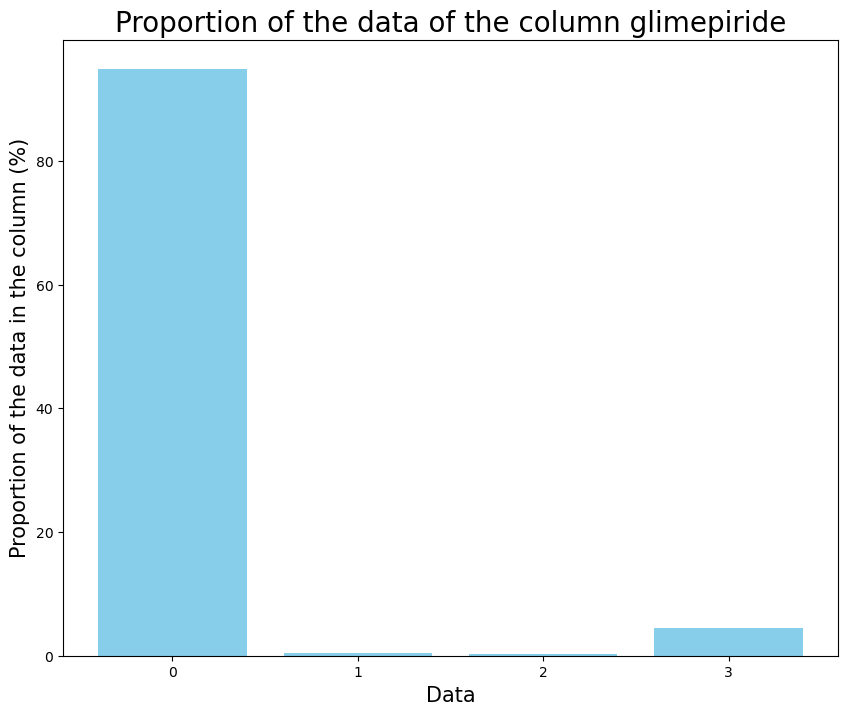

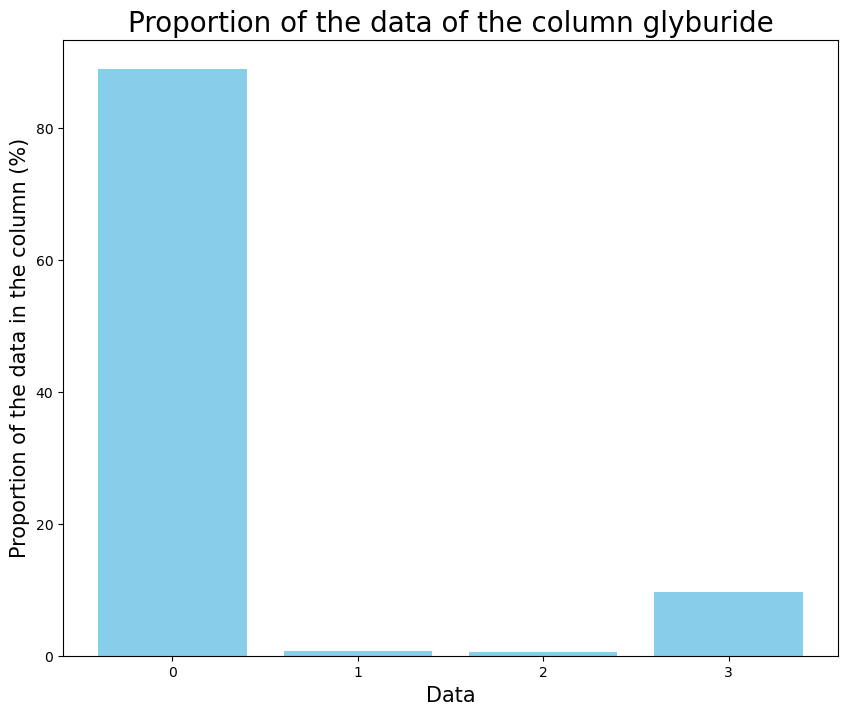

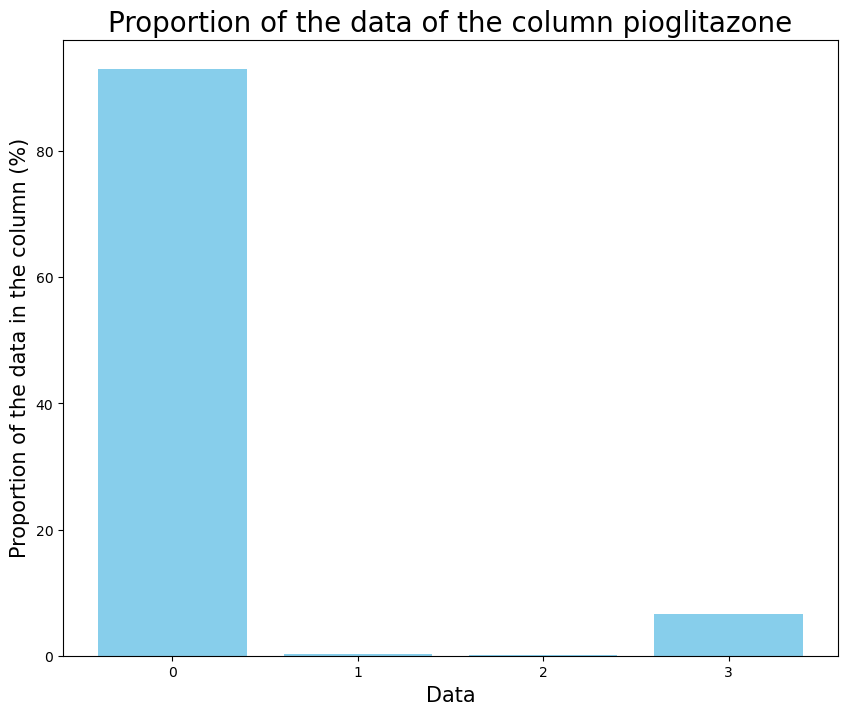

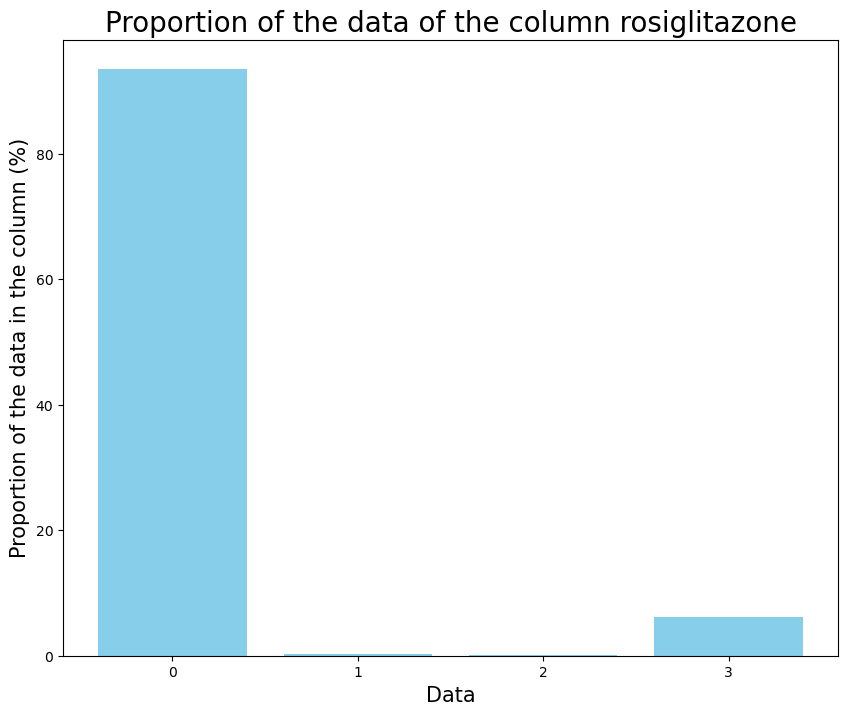

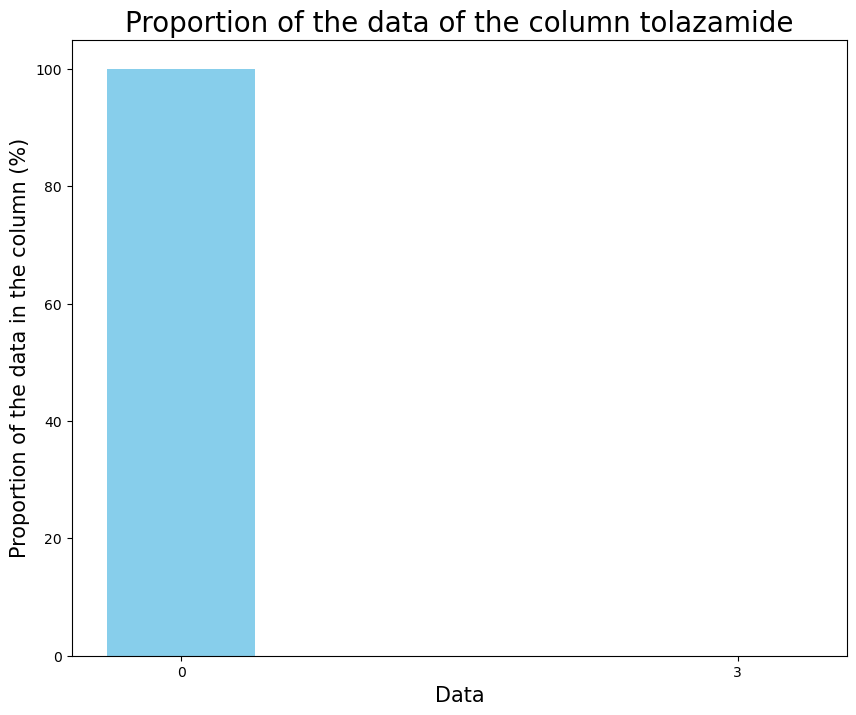

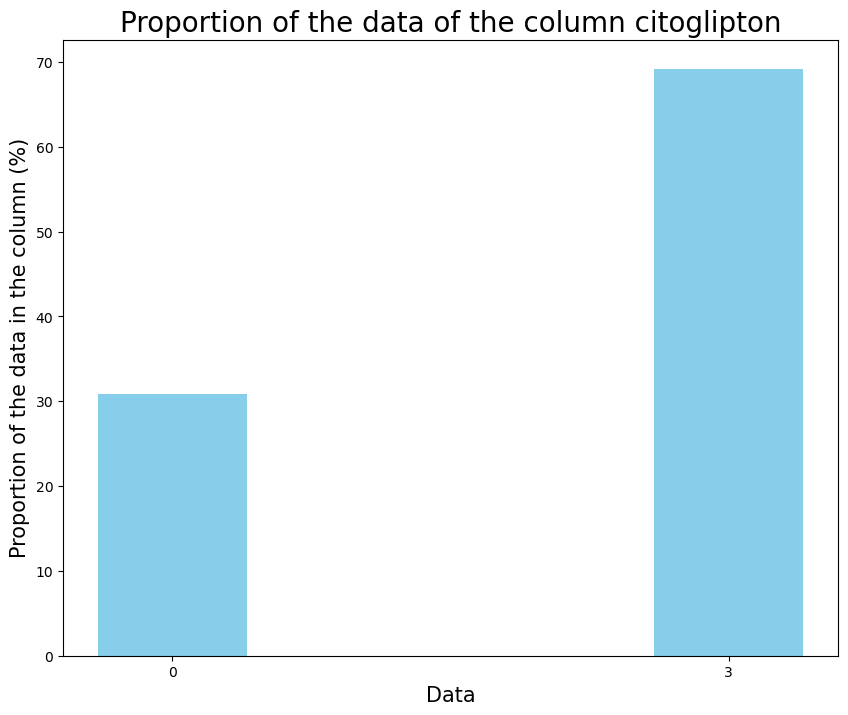

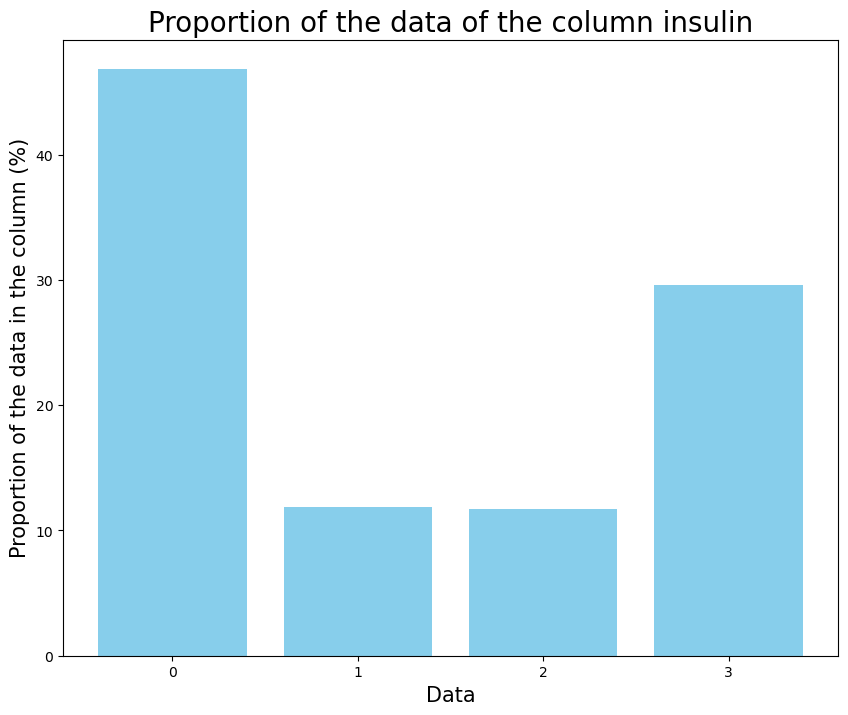

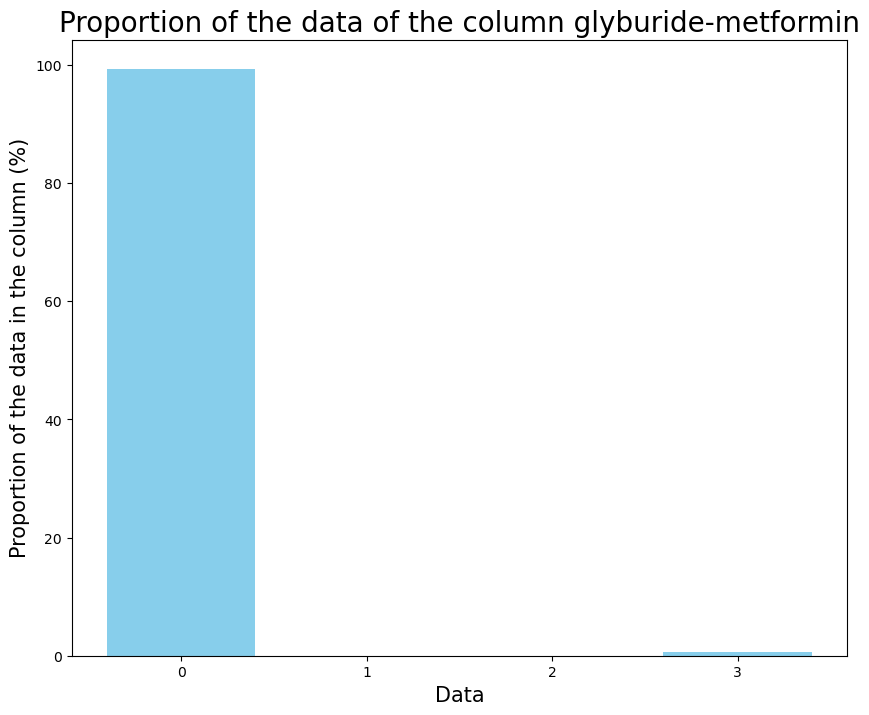

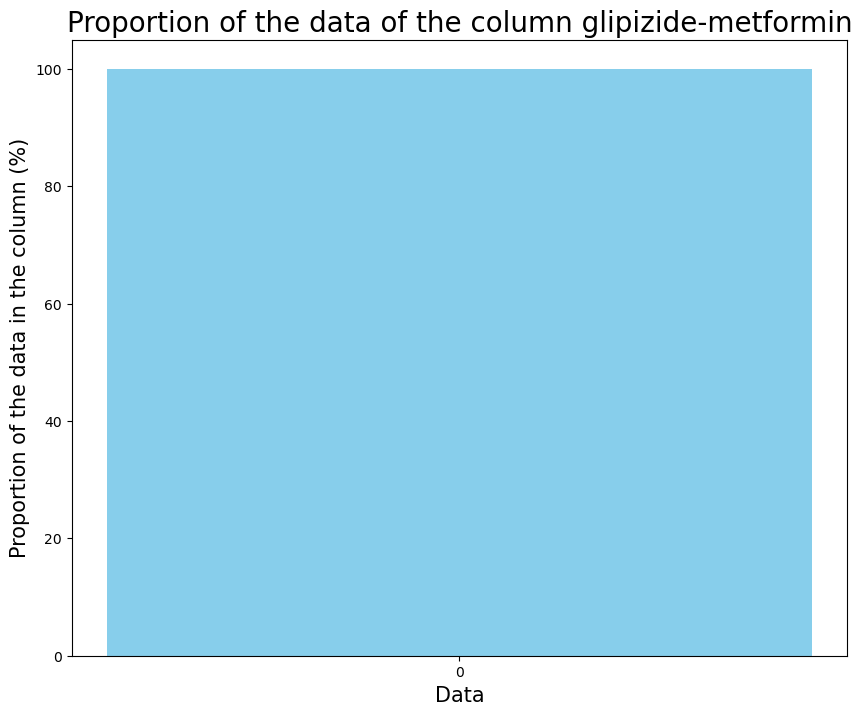

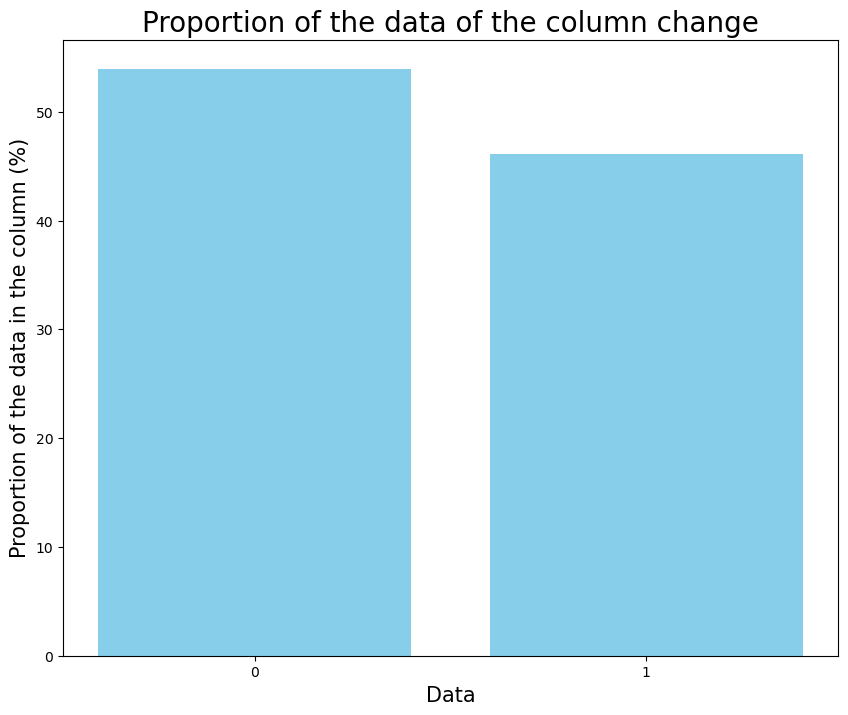

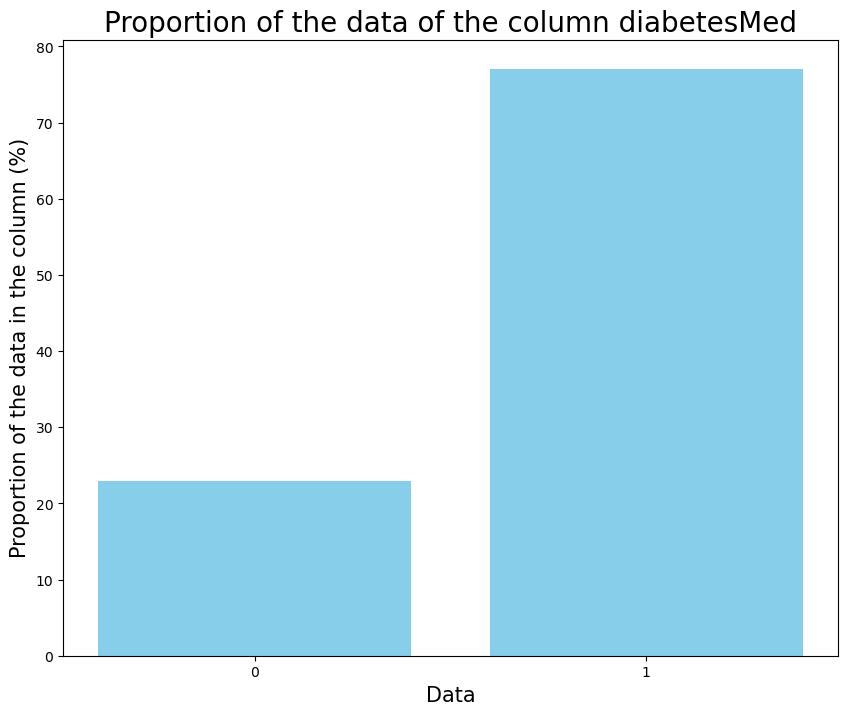

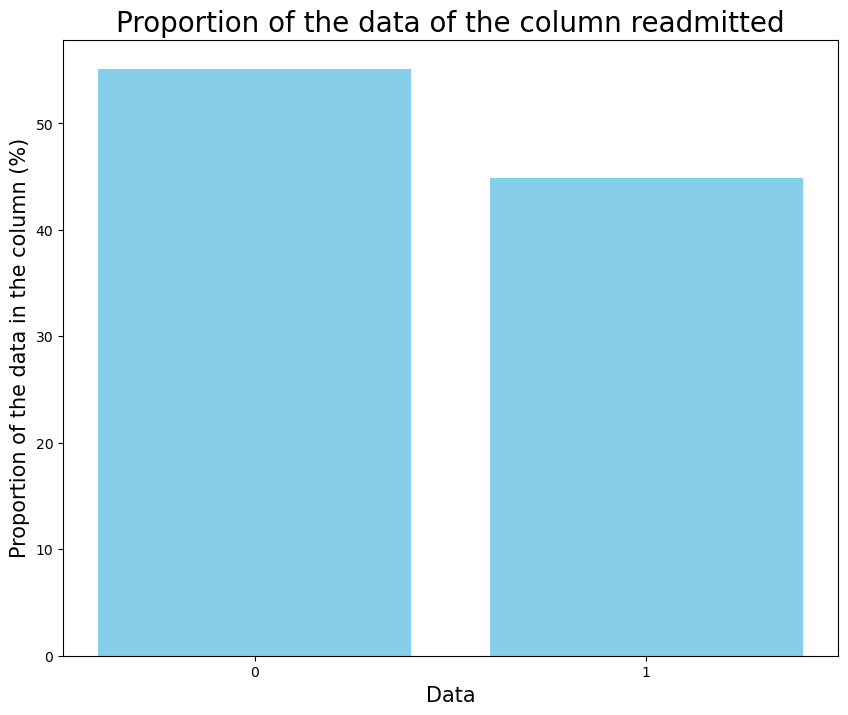

In [16]:
col=list(processed_data.columns)
cont=0
for i in col:
    plt.figure(cont,figsize=(10,8))

    plt.title("Proportion of the data of the column "+str(i),fontsize=20)
    plt.ylabel("Proportion of the data in the column (%)",fontsize=15)
    plt.xlabel("Data",fontsize=15)
    percentages = processed_data[[i]].apply(lambda col: col.value_counts(normalize=True) * 100)
    plt.bar(list(percentages.index), percentages.to_numpy()[:,0], color='skyblue')
    cont+=1

    plt.xticks(list(percentages.index))

Theses results shows that there are some colums with a high unbalance in the data (There are a huge amount of entries with only one value, while proportion of the others is quite low). These entries are:

glyburide-metformin, tolazamide, chlorpropamide, glipizide-metformin

Almost all the values of these columns are the same, therefore it can be removed without affecting the classification

In [17]:
#processed_data=processed_data.drop(["chlorpropamide","tolazamide","glyburide-metformin","glipizide-metformin"],axis=1)

In [18]:
processed_data.to_csv("processed_data.csv")

Now, I resecale the data to use it to data classification

In [19]:
analysis=pd.DataFrame(MinMaxScaler().fit_transform(processed_data),columns=processed_data.columns)

analysis.to_csv("analysis.csv")

In [20]:
dClass=analysis["readmitted"]
dfeature=analysis.drop(["readmitted"],axis=1)

# Feature selection: Embeded method

Now, I analyze which features are more relevants for the data classification. I will use two approach:

    - Trees
    - Random Forest

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

I divide the data in two sets.

    - train set: This is going to be used for the cross_validation to evaluate the behavior of the algorithm with the data.
    - test set: This is going to be used for the evaluation of the algorithm

The size of the test set is going to be the 10% of the total dataset

In [22]:
dtrain_feature,dtest_feature,dtrain_class,dtest_class=train_test_split(dfeature,dClass, test_size=0.000000001, random_state=0)
dtrain_feature=dtrain_feature.reset_index()
dtest_feature=dtest_feature.reset_index()
dtrain_class=dtrain_class.reset_index()
dtest_class=dtest_class.reset_index()

dtrain_feature.drop(["index"],axis=1,inplace=True)
dtest_feature.drop(["index"],axis=1,inplace=True)
dtrain_class.drop(["index"],axis=1,inplace=True)
dtest_class.drop(["index"],axis=1,inplace=True)

In [23]:
cont=0
cont2=0
features_seleccionadas_RF=pd.DataFrame(columns=dfeature.columns)
features_seleccionadas_DT=pd.DataFrame(columns=dfeature.columns)


RF_performance=pd.DataFrame(columns=["score"])


for i in range(30):
    kf=KFold(n_splits=10,shuffle=True)
    
    for train,test in kf.split(dtrain_feature,dtrain_class):

    
        dClass_train=dtrain_class.loc[train,"readmitted"].to_numpy()
        dClass_test=dtrain_class.loc[test]
    
        dfeature_train=dtrain_feature.loc[train]
        dfeature_test=dtrain_feature.loc[test]
    
        RF=RandomForestClassifier(criterion='entropy',n_estimators=256,max_depth=6,n_jobs=-1)
        
        RF.fit(dfeature_train,dClass_train)
        features_seleccionadas_RF.loc[cont]=RF.feature_importances_


        for tree in RF.estimators_:
            features_seleccionadas_DT.loc[cont2]=tree.feature_importances_
            cont2+=1
            
        cont+=1

        RF_performance.loc[i,"score"]=RF.score(dfeature_test,dClass_test)

In [24]:
features_seleccionadas_RF.describe()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide,pioglitazone,rosiglitazone,tolazamide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000
mean,0.015544,0.006898,0.037799,0.024009,0.078774,0.032244,0.039933,0.068647,0.032694,0.070012,...,0.008087,0.006149,0.006756,0.000165,0.006868,0.017919,0.002357,0.0,0.010659,0.009211
std,0.001348,0.000708,0.002100,0.001819,0.006261,0.003210,0.002125,0.003005,0.002228,0.003723,...,0.000924,0.000764,0.000777,0.000093,0.000674,0.001479,0.000441,0.0,0.001566,0.001250
min,0.012234,0.004675,0.032313,0.019062,0.062150,0.022823,0.034035,0.059780,0.026753,0.061192,...,0.005971,0.003956,0.004644,0.000000,0.005152,0.013471,0.001454,0.0,0.006827,0.006350
25%,0.014702,0.006429,0.036417,0.022763,0.074575,0.030179,0.038497,0.066748,0.031033,0.067506,...,0.007436,0.005632,0.006281,0.000107,0.006401,0.016801,0.002051,0.0,0.009549,0.008290
50%,0.015477,0.006865,0.037790,0.023927,0.078783,0.032100,0.039937,0.068443,0.032752,0.069885,...,0.007999,0.006101,0.006781,0.000163,0.006824,0.017952,0.002331,0.0,0.010538,0.009056
75%,0.016422,0.007412,0.039109,0.025188,0.083063,0.034212,0.041329,0.070578,0.034273,0.072181,...,0.008667,0.006678,0.007240,0.000223,0.007327,0.018929,0.002635,0.0,0.011602,0.009938
max,0.021384,0.008678,0.044883,0.029439,0.094121,0.043270,0.047614,0.078930,0.038914,0.080288,...,0.011269,0.008250,0.009359,0.000442,0.008724,0.022286,0.004194,0.0,0.015703,0.013661


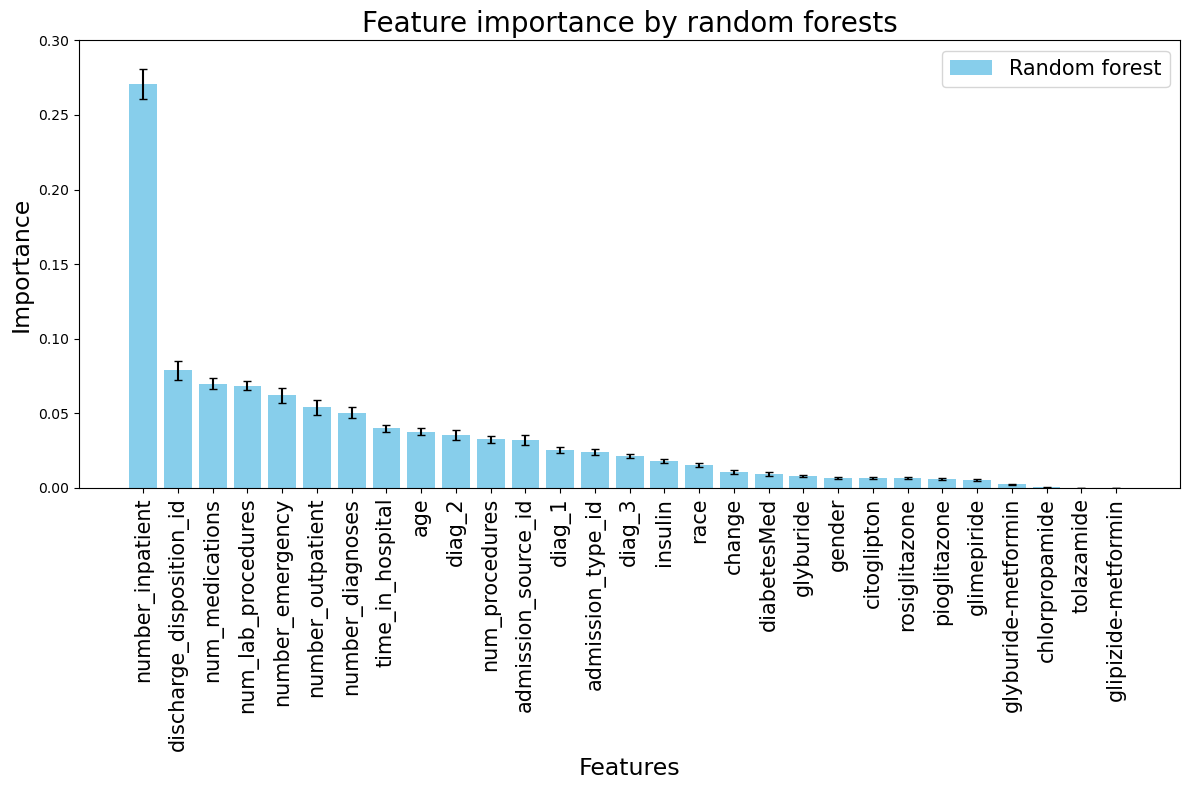

In [25]:
features_RF_promedio=features_seleccionadas_RF.describe()
features_DT_promedio=features_seleccionadas_DT.describe()

features_RF_promedio=features_RF_promedio.sort_values(by="mean",ascending=False,axis=1)
features_DT_promedio=features_DT_promedio.sort_values(by="mean",ascending=False,axis=1)


plt.figure(1,figsize=(12,8))

plt.title("Feature importance by random forests",fontsize=20)

plt.bar(features_RF_promedio.columns,features_RF_promedio.loc["mean",:],yerr=features_RF_promedio.loc["std",:],capsize=3,linewidth=0.1,color='skyblue',label="Random forest")
#plt.bar(features_DT_promedio.columns,features_DT_promedio.loc["mean",:],yerr=features_DT_promedio.loc["std",:],capsize=3,linewidth=0.1,color='#b8ff94')

plt.xlabel("Features",fontsize=17)
plt.ylabel("Importance",fontsize=17)
plt.yticks([i*0.05 for i in range(7)])
ticks=plt.xticks(rotation=90,fontsize=15)

plt.legend(loc="upper right",fontsize=15)

plt.tight_layout()

plt.savefig("feature_importance_RF.png",format="png",bbox_inches="tight")

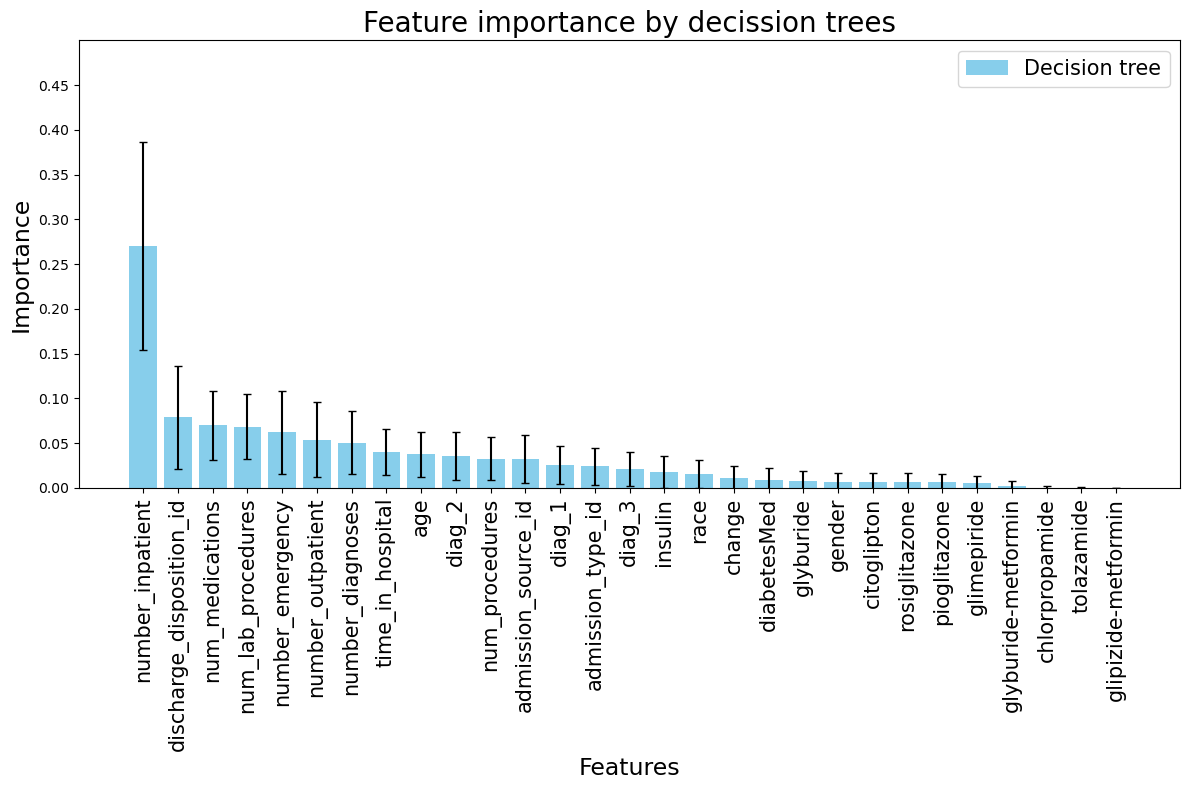

In [26]:
features_RF_promedio=features_seleccionadas_RF.describe()
features_DT_promedio=features_seleccionadas_DT.describe()

features_RF_promedio=features_RF_promedio.sort_values(by="mean",ascending=False,axis=1)
features_DT_promedio=features_DT_promedio.sort_values(by="mean",ascending=False,axis=1)


plt.figure(1,figsize=(12,8))

plt.title("Feature importance by decission trees",fontsize=20)

plt.bar(features_DT_promedio.columns,features_DT_promedio.loc["mean",:],yerr=features_DT_promedio.loc["std",:],capsize=3,linewidth=0.1,color='skyblue',label="Decision tree")

plt.xlabel("Features",fontsize=17)
plt.ylabel("Importance",fontsize=17)
plt.yticks([i*0.05 for i in range(10)])
ticks=plt.xticks(rotation=90,fontsize=15)
plt.ylim(0,0.5)
plt.legend(loc="upper right",fontsize=15)

plt.tight_layout()

plt.savefig("feature_importance_DT.png",format="png",bbox_inches="tight")

# Permutation feature importance


This method is particularly useful for non-lineal estimators. It consists on shuffle all the features and observing the degradation on model's performance score. While decision trees are effective for feature selection, they can assign more importance to the features that may no be predictive on unseen data. This method avoid to address this issue since it can be computed on unseen data.

https://scikit-learn.org/stable/modules/permutation_importance.html

In [27]:
RF=RandomForestClassifier(criterion='entropy',n_estimators=256,max_depth=6,n_jobs=-1)
RF.fit(dtrain_feature,dtrain_class.loc[:,"readmitted"].to_numpy())

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=256,
                       n_jobs=-1)

In [28]:
r = permutation_importance(RF, dtrain_feature,dtrain_class,n_repeats=10,random_state=34533,scoring="accuracy")

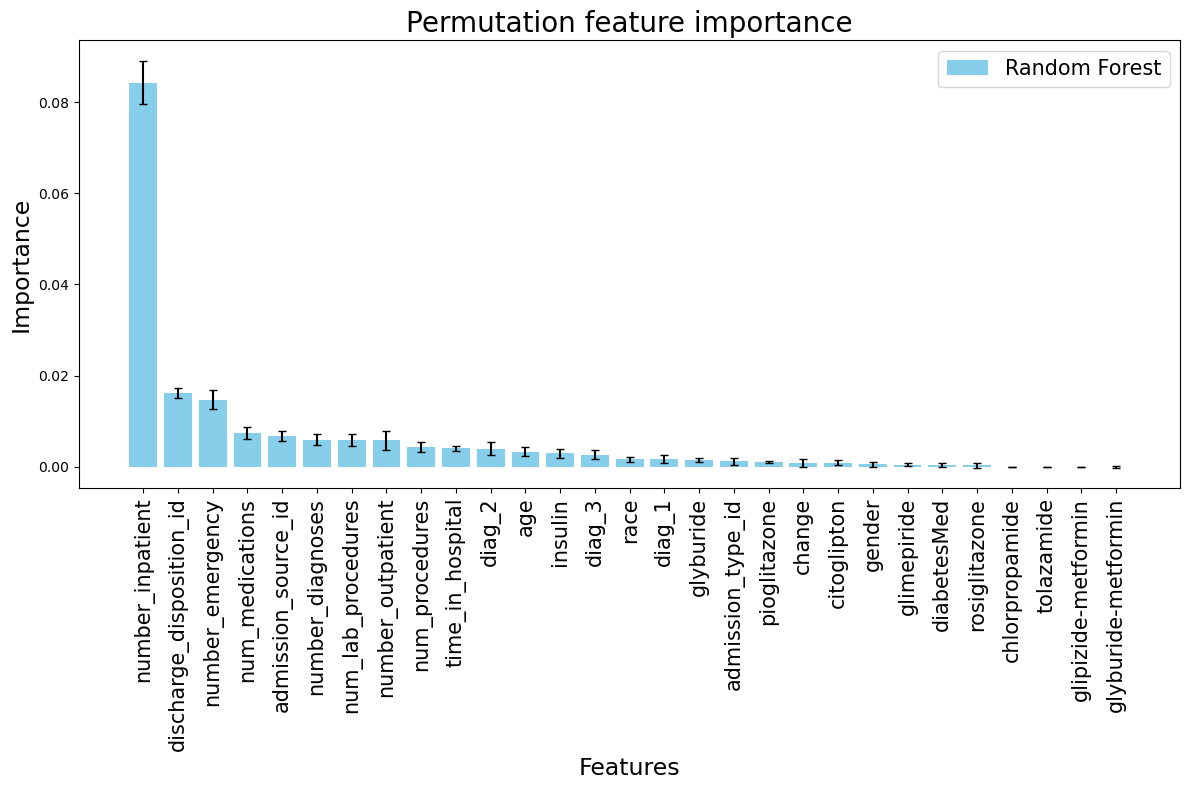

In [29]:
importance_feature_RF=pd.DataFrame(columns=dfeature.columns)

importance_feature_RF.loc["mean"]=r.importances_mean
importance_feature_RF.loc["std"]=r.importances_std


importance_feature_RF=importance_feature_RF.sort_values(by="mean",ascending=False,axis=1)


plt.figure(1,figsize=(12,8))

plt.title("Permutation feature importance",fontsize=20)

plt.bar(importance_feature_RF.columns,importance_feature_RF.loc["mean",:],yerr=importance_feature_RF.loc["std",:],capsize=3,linewidth=0.1,color='skyblue',label="Random Forest")

plt.xlabel("Features",fontsize=17)
plt.ylabel("Importance",fontsize=17)
#plt.yticks([i*0.05 for i in range(2)])
ticks=plt.xticks(rotation=90,fontsize=15)
#plt.ylim(0,0.5)
plt.legend(loc="upper right",fontsize=15)

plt.tight_layout()

plt.savefig("feature_importance_permutation_RF.png",format="png",bbox_inches="tight")

I check which properties that are classified in the same position for each of the methods

In [30]:
feat_RF=list(features_RF_promedio.columns)
feat_DT=list(features_DT_promedio.columns)
feat_per=list(importance_feature_RF.columns)

for i in range(len(feat_RF)):
    if(features_RF_promedio.loc["mean",feat_RF[i]]<=1.0e-3):
        print("RF ",feat_RF[i])
    if(features_DT_promedio.loc["mean",feat_DT[i]]<=1.0e-3):
        print("DT ",feat_DT[i])
    if(importance_feature_RF.loc["mean",feat_per[i]]<=1.0e-3):
        print("Per ",feat_per[i])

Per  pioglitazone
Per  change
Per  citoglipton
Per  gender
Per  glimepiride
Per  diabetesMed
Per  rosiglitazone
Per  chlorpropamide
RF  chlorpropamide
DT  chlorpropamide
Per  tolazamide
RF  tolazamide
DT  tolazamide
Per  glipizide-metformin
RF  glipizide-metformin
DT  glipizide-metformin
Per  glyburide-metformin


With the results of the feature selection, we could see that:

    -chlorpropamide,tolazamide,glyburide-metformin,glipizide-metformin has no relevance for the classification. This result matches the previous discussion about the unbalance     on the data distribution in these columns.

    - I also found that pioglitazone is not relevant in any of the test so it can be discharted. Moreover, the citoglipton cannot be discharted even though its classification by the embeded approach isn't too good because it gets a better score for the wrapped approach.
    
    - The most important feature is the number_inpatient followed by the discharge dispossition

    - The results obtained by the two methods are different. This is produced because the criteria used by the embedded approach for the classification emphasize in the model-intrinsic importance. However, the permutation approach is based on a maximization of the accuarcy of the model

In [31]:
processed_data=processed_data.drop(["chlorpropamide","tolazamide","glyburide-metformin","glipizide-metformin","pioglitazone"],axis=1)

In [32]:
analysis=pd.DataFrame(MinMaxScaler().fit_transform(processed_data),columns=processed_data.columns)

analysis.to_csv("analysis.csv")

dClass=analysis["readmitted"]
dfeature=analysis.drop(["readmitted"],axis=1)

# Model

To evaluate the performance of the models, the followings metrics will be computed:


    - Accuracy: Measures the proportion of correctly identified samples.

    -  Cost matrix: Mistakes on the classification of patient's medical condition can have serious consequences. Therefore, wrong classifications will be penalized using a cost matrix. Since it is especially important to correctly identify sick patients, the cost matrix will assign a higher penalty to false negatives (i.e., cases where a sick patient is wrongly classified as healthy):

\begin{equation}
        C=\left(\begin{matrix}
            -3 & 5\\
            5 & 0
        \end{matrix}\right)
\end{equation}

    I consider that it's more more important to classify a patient as sick rather than healthy in case of doubt.

    -  Precision: Measure the ability of a classifier to avoid labeling negative samples as positive.

    -  Recall: Reflects the ability of the classifier to correctly identify all positive samples.

    -  F1-score: It can be seen as the harmonic mean of the precision and recall.

     - AUC: Represents the area under the ROC curve, which plots the true positive rate against the false positive rate.



These scores will be computed for each model and across different parameter values to determine which configurations yield the best performance. Cross-validation will be used for each of parameter setting to obtain the average value of the metrics. These results will be visualized to identify the parameter values that lead to optimal overall model performance.

Finally, each model will be trained using the set of parameters that yielded the best performance. Cross-validation will be performed again to compute the evaluation metrics and asses the final performance of each model.


# **Decission tree**

In [62]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [63]:
models={
    "DT":pd.DataFrame(columns=["accuracy","cost","precision","recall","Fmeasure","roc"]),
    "RF":pd.DataFrame(columns=["accuracy","cost","precision","recall","Fmeasure","roc"]),
    "SVM":pd.DataFrame(columns=["accuracy","cost","precision","recall","Fmeasure","roc"]),
    "SVMS":pd.DataFrame(columns=["accuracy","cost","precision","recall","Fmeasure","roc"]),
    "SVML":pd.DataFrame(columns=["accuracy","cost","precision","recall","Fmeasure","roc"]),
    "SVMR":pd.DataFrame(columns=["accuracy","cost","precision","recall","Fmeasure","roc"]),
    "KNN":pd.DataFrame(columns=["accuracy","cost","precision","recall","Fmeasure","roc"]),
    "BY":pd.DataFrame(columns=["accuracy","cost","precision","recall","Fmeasure","roc"]),
    "LR":pd.DataFrame(columns=["accuracy","cost","precision","recall","Fmeasure","roc"])
}

models_roc={
    "DT":pd.DataFrame(columns=["fpr","tp"]),
    "RF":pd.DataFrame(columns=["fpr","tp"]),
    "SVM":pd.DataFrame(columns=["fpr","tp"]),
    "SVMS":pd.DataFrame(columns=["fpr","tp"]),
    "SVML":pd.DataFrame(columns=["fpr","tp"]),
    "SVMR":pd.DataFrame(columns=["fpr","tp"]),
    "KNN":pd.DataFrame(columns=["fpr","tp"]),
    "BY":pd.DataFrame(columns=["fpr","tp"]),
    "LR":pd.DataFrame(columns=["fpr","tp"])
}


cost_matrix=np.array([[-3,10.0],[5.0,1.0]])


The mean metrics are computed for different values of the paremeters of the decision tree in order to find for which values the metrics are maximized. In this situation, I will compute the metrics for depth 1,2...20

In [64]:
kf=KFold(n_splits=10,shuffle=True)

modelo="DT"

result=np.zeros((19,12))
    
    
kf=KFold(n_splits=20,shuffle=True)

for depth in range(1,20):
    cont=0
    
    for train,test in kf.split(dfeature,dClass):
    
    
        dfeature_train=dfeature.iloc[train,:]
        dfeature_test=dfeature.iloc[test,:]
    
        dClass_train=dClass.iloc[train]
        dClass_test=dClass.iloc[test]
    
    
        DT=DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=depth)
    
        DT.fit(dfeature_train,dClass_train)
    
        models[modelo].loc[cont,"accuracy"]=DT.score(dfeature_test,dClass_test)
        models[modelo].loc[cont,"precision"]=precision_score(dClass_test,DT.predict(dfeature_test))
        models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,DT.predict(dfeature_test))
        models[modelo].loc[cont,"recall"]=recall_score(dClass_test,DT.predict(dfeature_test))
        models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,DT.predict_proba(dfeature_test)[:,1])
    
        coff_matrix=confusion_matrix(dClass_test,DT.predict(dfeature_test))
    
        models[modelo].loc[cont,"cost"]=0
    
        for i in range(2):
            for j in range(2):
                models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
            
        
        cont+=1

    result[depth-1,0:6]=models[modelo].mean().to_numpy()
    result[depth-1,6:12]=models[modelo].std().to_numpy()
    

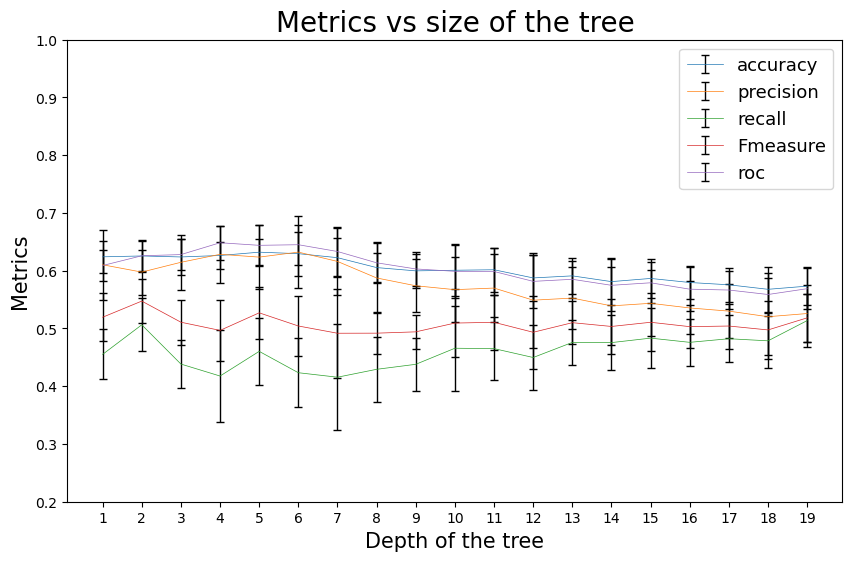

In [65]:
plt.figure(1,figsize=(10,6))

plt.title("Metrics vs size of the tree",fontsize=20)

plt.xlabel("Depth of the tree",fontsize=15)
plt.ylabel("Metrics",fontsize=15)

metrics=["accuracy","cost","precision","recall","Fmeasure","roc"]

plt.ylim(0.2,1.0)

for i in range(len(metrics)):
    if(i!=1):
        plt.errorbar(list(range(1,20)),result[:,i],yerr=result[:,6+i],capsize=3,ecolor="#000000",elinewidth=1.0,linewidth=0.5,label=metrics[i])

plt.legend(loc="upper right",fontsize=13)

z=plt.xticks(list(range(1,20)))

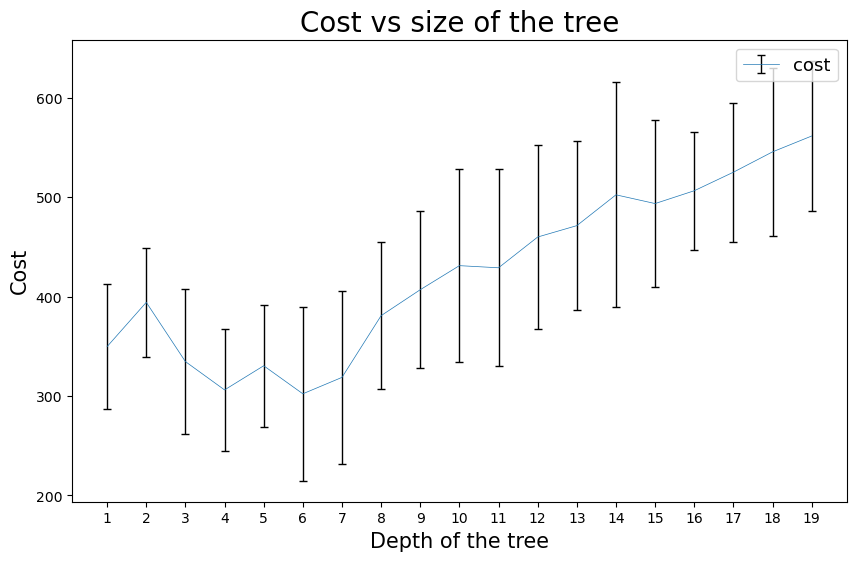

In [66]:
plt.figure(1,figsize=(10,6))

plt.title("Cost vs size of the tree",fontsize=20)

plt.xlabel("Depth of the tree",fontsize=15)
plt.ylabel("Cost",fontsize=15)

metrics=["accuracy","cost","precision","recall","Fmeasure","roc"]


for i in range(len(metrics)):
    if(i==1):
        plt.errorbar(list(range(1,20)),result[:,i],yerr=result[:,6+i],capsize=3,ecolor="#000000",elinewidth=1.0,linewidth=0.5,label=metrics[i])

plt.legend(loc="upper right",fontsize=13)

z=plt.xticks(list(range(1,20)))

The picture shows that the model doesn't exhibit a huge dependence of the depth of the trees for the classification. Therefore, max_depth=6 is choosen to study the model. This value is chosen because is the value at which the accuracy, precision and roc shows more similiar results. Furthermore, a minimum in the cost function is found at this value

In [67]:

    
kf=KFold(n_splits=10,shuffle=True)

cont=0
    
for train,test in kf.split(dfeature,dClass):
    
    
    dfeature_train=dfeature.iloc[train,:]
    dfeature_test=dfeature.iloc[test,:]
    
    dClass_train=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
        
        
    DT=DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=depth)
        
    DT.fit(dfeature_train,dClass_train)
        
    models[modelo].loc[cont,"accuracy"]=DT.score(dfeature_test,dClass_test)
    models[modelo].loc[cont,"precision"]=precision_score(dClass_test,DT.predict(dfeature_test))
    models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,DT.predict(dfeature_test))
    models[modelo].loc[cont,"recall"]=recall_score(dClass_test,DT.predict(dfeature_test))
    models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,DT.predict_proba(dfeature_test)[:,1])
        
    coff_matrix=confusion_matrix(dClass_test,DT.predict(dfeature_test))
        
    models[modelo].loc[cont,"cost"]=0

    x,y,_=roc_curve(dClass_test,DT.predict_proba(dfeature_test)[:,1])

    for i in range(x.size):
        models_roc[modelo].loc[i,"fpr"]=x[i]
        models_roc[modelo].loc[i,"tp"]=y[i]

    for i in range(2):
        for j in range(2):
            models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
                
            
    cont+=1

# **Random forest**

I repeat the same procedure as before but now, I optimize in terms of the number of estimators

In [91]:
modelo="RF"

result=np.zeros((19,12))


kf=KFold(n_splits=10,shuffle=True)

for depth in range(1,20):
    cont=0
    
    for train,test in kf.split(dfeature,dClass):
    
    
        dfeature_train=dfeature.iloc[train,:]
        dfeature_test=dfeature.iloc[test,:]
    
        dClass_train=dClass.iloc[train]
        dClass_test=dClass.iloc[test]
    
    
        model=RandomForestClassifier(criterion='entropy',n_estimators=20*depth,max_depth=6,n_jobs=-1)
    
        model.fit(dfeature_train,dClass_train)
    
        models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
        models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
    
        coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
    
        models[modelo].loc[cont,"cost"]=0
    
        for i in range(2):
            for j in range(2):
                models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
            
        
        cont+=1

    result[depth-1,0:6]=models[modelo].mean().to_numpy()
    result[depth-1,6:12]=models[modelo].std().to_numpy()

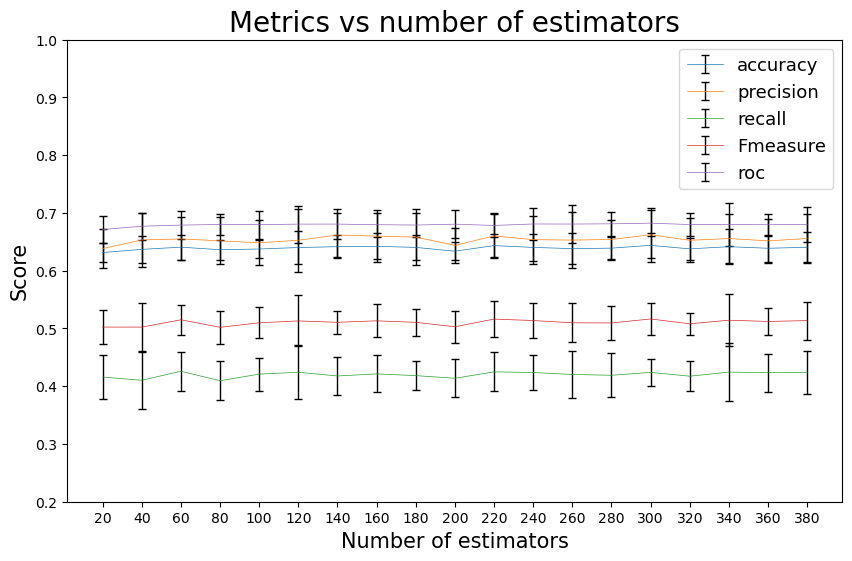

In [92]:
plt.figure(1,figsize=(10,6))

plt.title("Metrics vs number of estimators",fontsize=20)

plt.xlabel("Number of estimators",fontsize=15)
plt.ylabel("Score",fontsize=15)

metrics=["accuracy","cost","precision","recall","Fmeasure","roc"]
labels=["Accuracy","Precision","Recall","F-measure","ROC","Cost"]


plt.ylim(0.2,1.0)

for i in range(len(metrics)):
    if(i!=1):
        plt.errorbar(list(20*(i+1) for i in range(19)),result[:,i],yerr=result[:,6+i],capsize=3,ecolor="#000000",elinewidth=1.0,linewidth=0.5,label=metrics[i])


plt.legend(loc="upper right",fontsize=13)

z=plt.xticks(list(20*(i+1) for i in range(19)))

plt.savefig("performance_RF.png",format="png",bbox_inches="tight")

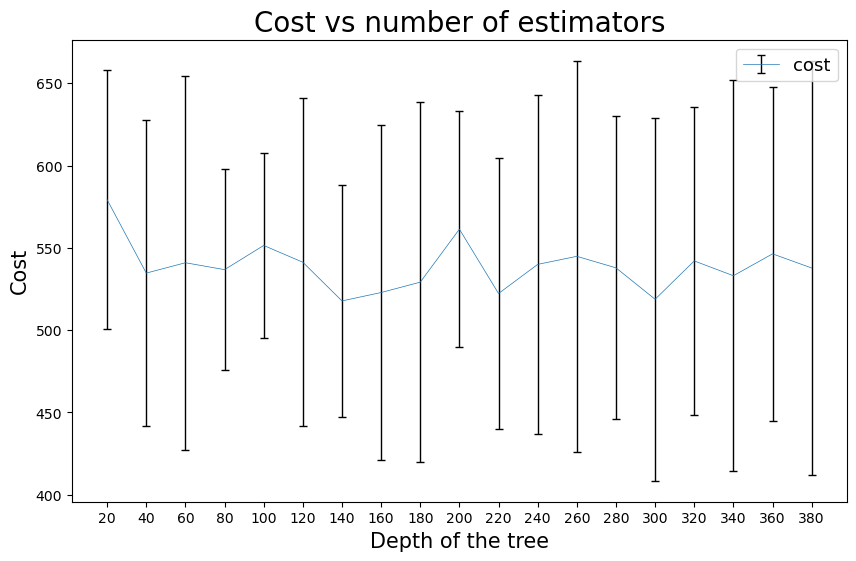

In [93]:
plt.figure(1,figsize=(10,6))

plt.title("Cost vs number of estimators",fontsize=20)

plt.xlabel("Depth of the tree",fontsize=15)
plt.ylabel("Cost",fontsize=15)

metrics=["accuracy","cost","precision","recall","Fmeasure","roc"]


for i in range(len(metrics)):
    if(i==1):
        plt.errorbar(list(20*(i+1) for i in range(19)),result[:,i],yerr=result[:,6+i],capsize=3,ecolor="#000000",elinewidth=1.0,linewidth=0.5,label=metrics[i])

plt.legend(loc="upper right",fontsize=13)

z=plt.xticks(list(20*(i+1) for i in range(19)))

plt.savefig("performance_cost_RF.png",format="png",bbox_inches="tight")

This results shows that the result of the metrics is almost constant with the number of estimator. Therefore, I will choose as  number of estimators 100 because at this value there is a minimum in the cost function, and is not large enough to produce overfitting

In [94]:

    
kf=KFold(n_splits=10,shuffle=True)

cont=0
    
for train,test in kf.split(dfeature,dClass):
    
    
    dfeature_train=dfeature.iloc[train,:]
    dfeature_test=dfeature.iloc[test,:]
    
    dClass_train=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
        
        
    model=RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=6,n_jobs=-1)
        
    model.fit(dfeature_train,dClass_train)
        
    models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
    models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
        
    coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
        
    models[modelo].loc[cont,"cost"]=0

    x,y,_=roc_curve(dClass_test,model.predict_proba(dfeature_test)[:,1])

    for i in range(x.size):
        models_roc[modelo].loc[i,"fpr"]=x[i]
        models_roc[modelo].loc[i,"tp"]=y[i]
    
    for i in range(2):
        for j in range(2):
            models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
                
            
    cont+=1

# **KNN**

In [72]:
modelo="KNN"


result=np.zeros((19,12))


kf=KFold(n_splits=10,shuffle=True)

for depth in range(1,20):
    cont=0
    
    for train,test in kf.split(dfeature,dClass):
    
    
        dfeature_train=dfeature.iloc[train,:]
        dfeature_test=dfeature.iloc[test,:]
    
        dClass_train=dClass.iloc[train]
        dClass_test=dClass.iloc[test]
    
    
        model=KNeighborsClassifier(n_neighbors=depth,n_jobs=-1)
    
        model.fit(dfeature_train,dClass_train)
    
        models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
        models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
    
        coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
    
        models[modelo].loc[cont,"cost"]=0
    
        for i in range(2):
            for j in range(2):
                models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
            
        
        cont+=1

    result[depth-1,0:6]=models[modelo].mean().to_numpy()
    result[depth-1,6:12]=models[modelo].std().to_numpy()

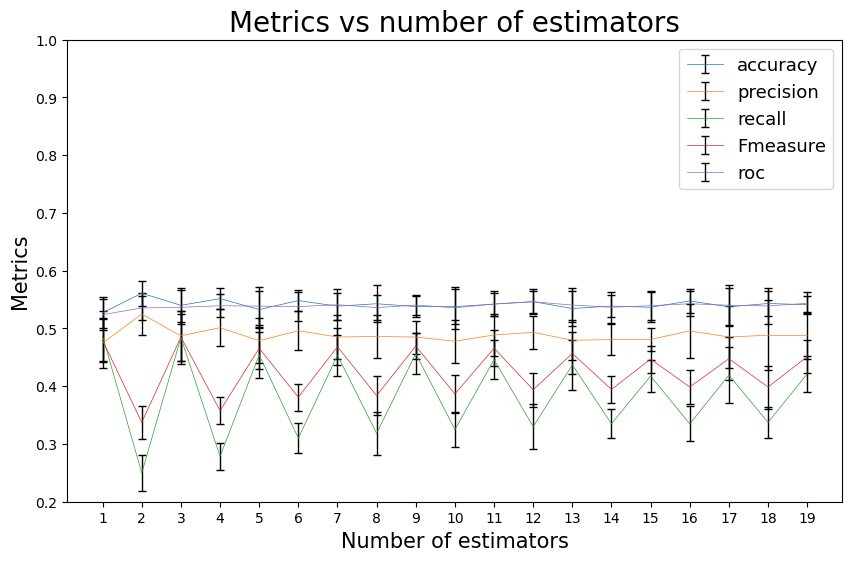

In [73]:
plt.figure(1,figsize=(10,6))

plt.title("Metrics vs number of estimators",fontsize=20)

plt.xlabel("Number of estimators",fontsize=15)
plt.ylabel("Metrics",fontsize=15)

metrics=["accuracy","cost","precision","recall","Fmeasure","roc"]

plt.ylim(0.2,1.0)

for i in range(len(metrics)):
    if(i!=1):
        plt.errorbar(list((i+1) for i in range(19)),result[:,i],yerr=result[:,6+i],capsize=3,ecolor="#000000",elinewidth=1.0,linewidth=0.5,label=metrics[i])

plt.legend(loc="upper right",fontsize=13)

z=plt.xticks(list((i+1) for i in range(19)))

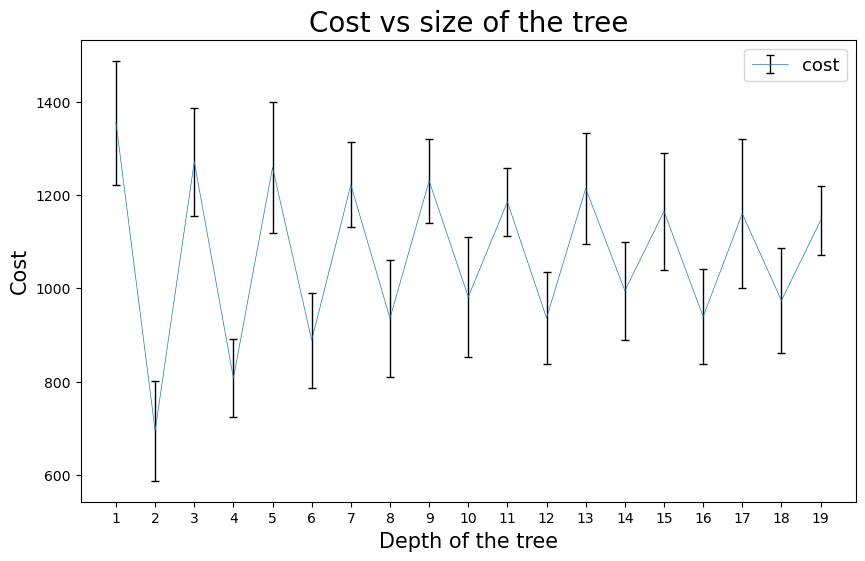

In [74]:
plt.figure(1,figsize=(10,6))

plt.title("Cost vs size of the tree",fontsize=20)

plt.xlabel("Depth of the tree",fontsize=15)
plt.ylabel("Cost",fontsize=15)

metrics=["accuracy","cost","precision","recall","Fmeasure","roc"]


for i in range(len(metrics)):
    if(i==1):
        plt.errorbar(list((i+1) for i in range(19)),result[:,i],yerr=result[:,6+i],capsize=3,ecolor="#000000",elinewidth=1.0,linewidth=0.5,label=metrics[i])

plt.legend(loc="upper right",fontsize=13)

z=plt.xticks(list((i+1) for i in range(19)))

We can observe a curious behavior, because the results with an odd number of estimators gives a worst result that with an even number on the cost. I choose as a number of neigbors of 2, since it is the value at which I obtain a lower cost

In [75]:

    
    
kf=KFold(n_splits=10,shuffle=True)

cont=0
    
for train,test in kf.split(dfeature,dClass):
    
    
    dfeature_train=dfeature.iloc[train,:]
    dfeature_test=dfeature.iloc[test,:]
    
    dClass_train=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
        
        
    model=KNeighborsClassifier(n_neighbors=2,n_jobs=-1)
        
    model.fit(dfeature_train,dClass_train)
        
    models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
    models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
        
    coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
        
    models[modelo].loc[cont,"cost"]=0

    x,y,_=roc_curve(dClass_test,model.predict_proba(dfeature_test)[:,1])

    for i in range(x.size):
        models_roc[modelo].loc[i,"fpr"]=x[i]
        models_roc[modelo].loc[i,"tp"]=y[i]
        
    for i in range(2):
        for j in range(2):
            models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
                
            
    cont+=1

# **Bayes**

In [76]:
modelo="BY"


    
    
kf=KFold(n_splits=10,shuffle=True)

cont=0
    
for train,test in kf.split(dfeature,dClass):
    
    
    dfeature_train=dfeature.iloc[train,:]
    dfeature_test=dfeature.iloc[test,:]
    
    dClass_train=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
        
        
    model=GaussianNB()
        
    model.fit(dfeature_train,dClass_train)
        
    models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
    models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
        
    coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
        
    models[modelo].loc[cont,"cost"]=0

    x,y,_=roc_curve(dClass_test,model.predict_proba(dfeature_test)[:,1])

    for i in range(x.size):
        models_roc[modelo].loc[i,"fpr"]=x[i]
        models_roc[modelo].loc[i,"tp"]=y[i]

    
    for i in range(2):
        for j in range(2):
            models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
                
            
    cont+=1

# **SVM**

In [77]:
modelo="SVM"


result=np.zeros((9,12))


kf=KFold(n_splits=10,shuffle=True)

for depth in range(1,10):
    cont=0
    
    for train,test in kf.split(dfeature,dClass):
    
    
        dfeature_train=dfeature.iloc[train,:]
        dfeature_test=dfeature.iloc[test,:]
    
        dClass_train=dClass.iloc[train]
        dClass_test=dClass.iloc[test]
    
    
        model=SVC(kernel="poly",degree=depth,probability=True)
    
        model.fit(dfeature_train,dClass_train)
    
        models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
        models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
    
        coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
    
        models[modelo].loc[cont,"cost"]=0


        
        
        for i in range(2):
            for j in range(2):
                models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
            
        
        cont+=1

    result[depth-1,0:6]=models[modelo].mean().to_numpy()
    result[depth-1,6:12]=models[modelo].std().to_numpy()

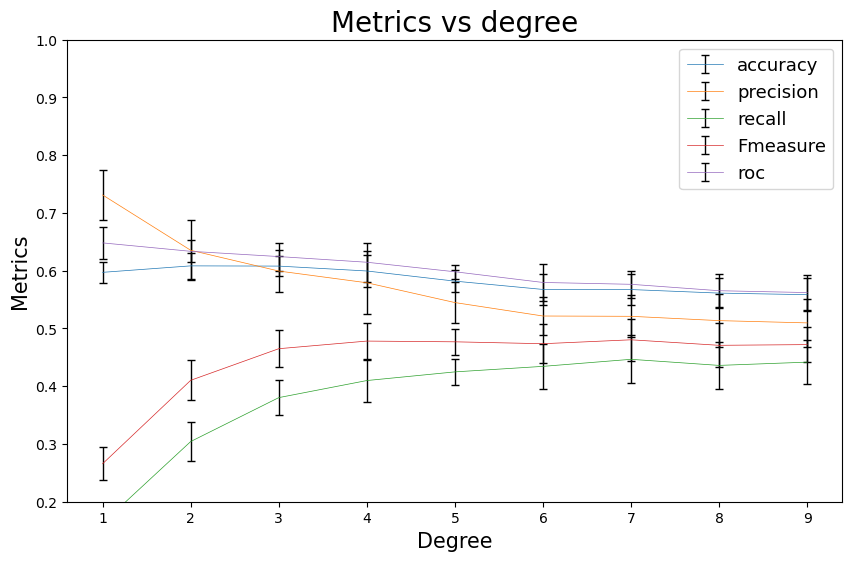

In [78]:
plt.figure(1,figsize=(10,6))

plt.title("Metrics vs degree",fontsize=20)

plt.xlabel("Degree",fontsize=15)
plt.ylabel("Metrics",fontsize=15)

metrics=["accuracy","cost","precision","recall","Fmeasure","roc"]

plt.ylim(0.2,1.0)

for i in range(len(metrics)):
    if(i!=1):
        plt.errorbar(list((i+1) for i in range(9)),result[:,i],yerr=result[:,6+i],capsize=3,ecolor="#000000",elinewidth=1.0,linewidth=0.5,label=metrics[i])

plt.legend(loc="upper right",fontsize=13)

z=plt.xticks(list((i+1) for i in range(9)))

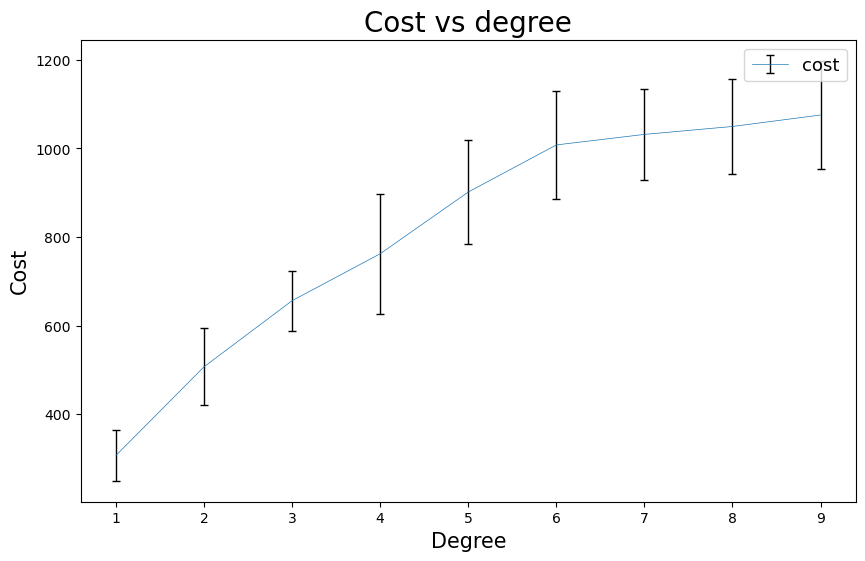

In [79]:
plt.figure(1,figsize=(10,6))

plt.title("Cost vs degree",fontsize=20)

plt.xlabel("Degree",fontsize=15)
plt.ylabel("Cost",fontsize=15)

metrics=["accuracy","cost","precision","recall","Fmeasure","roc"]


for i in range(len(metrics)):
    if(i==1):
        plt.errorbar(list((i+1) for i in range(9)),result[:,i],yerr=result[:,6+i],capsize=3,ecolor="#000000",elinewidth=1.0,linewidth=0.5,label=metrics[i])

plt.legend(loc="upper right",fontsize=13)

z=plt.xticks(list((i+1) for i in range(9)))

This plots shows that the best degree is 3. At this value, the result of the cost function is not to high, and the results of the accuracy, precision and roc are close. Furthermore, the F-measure and recall are close to reach a maximum

In [80]:

    
kf=KFold(n_splits=10,shuffle=True)

cont=0
    
for train,test in kf.split(dfeature,dClass):
    
    
    dfeature_train=dfeature.iloc[train,:]
    dfeature_test=dfeature.iloc[test,:]
    
    dClass_train=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
        
        
    model=SVC(kernel="poly",degree=3,probability=True)
        
    model.fit(dfeature_train,dClass_train)
        
    models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
    models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
        
    coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
        
    models[modelo].loc[cont,"cost"]=0


    x,y,_=roc_curve(dClass_test,model.predict_proba(dfeature_test)[:,1])

    for i in range(x.size):
        models_roc[modelo].loc[i,"fpr"]=x[i]
        models_roc[modelo].loc[i,"tp"]=y[i]
        
    for i in range(2):
        for j in range(2):
            models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
                
            
    cont+=1

In [81]:
modelo="SVMS"

    
    
kf=KFold(n_splits=10,shuffle=True)

cont=0
    
for train,test in kf.split(dfeature,dClass):
    
    
    dfeature_train=dfeature.iloc[train,:]
    dfeature_test=dfeature.iloc[test,:]
    
    dClass_train=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
        
        
    model=SVC(kernel="sigmoid",probability=True)
        
    model.fit(dfeature_train,dClass_train)
        
    models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
    models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
        
    coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
        
    models[modelo].loc[cont,"cost"]=0

    x,y,_=roc_curve(dClass_test,model.predict_proba(dfeature_test)[:,1])

    for i in range(x.size):
        models_roc[modelo].loc[i,"fpr"]=x[i]
        models_roc[modelo].loc[i,"tp"]=y[i]
        
    for i in range(2):
        for j in range(2):
            models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
                
            
    cont+=1

In [82]:
modelo="SVMR"

    
    
kf=KFold(n_splits=10,shuffle=True)

cont=0
    
for train,test in kf.split(dfeature,dClass):
    
    
    dfeature_train=dfeature.iloc[train,:]
    dfeature_test=dfeature.iloc[test,:]
    
    dClass_train=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
        
        
    model=SVC(kernel="rbf",probability=True)
        
    model.fit(dfeature_train,dClass_train)
        
    models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
    models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
        
    coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
        
    models[modelo].loc[cont,"cost"]=0

    x,y,_=roc_curve(dClass_test,model.predict_proba(dfeature_test)[:,1])

    for i in range(x.size):
        models_roc[modelo].loc[i,"fpr"]=x[i]
        models_roc[modelo].loc[i,"tp"]=y[i]
        
    for i in range(2):
        for j in range(2):
            models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
                
            
    cont+=1

In [83]:
modelo="SVML"

    
    
kf=KFold(n_splits=10,shuffle=True)

cont=0
    
for train,test in kf.split(dfeature,dClass):
    
    
    dfeature_train=dfeature.iloc[train,:]
    dfeature_test=dfeature.iloc[test,:]
    
    dClass_train=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
        
        
    model=SVC(kernel="linear",probability=True)
        
    model.fit(dfeature_train,dClass_train)
        
    models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
    models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
        
    coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
        
    models[modelo].loc[cont,"cost"]=0

    x,y,_=roc_curve(dClass_test,model.predict_proba(dfeature_test)[:,1])

    for i in range(x.size):
        models_roc[modelo].loc[i,"fpr"]=x[i]
        models_roc[modelo].loc[i,"tp"]=y[i]
        
    for i in range(2):
        for j in range(2):
            models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
                
            
    cont+=1

# **Logistic regression**

In [84]:
modelo="LR"


result=np.zeros((19,12))


kf=KFold(n_splits=10,shuffle=True)

for depth in range(1,20):
    cont=0
    
    for train,test in kf.split(dfeature,dClass):
    
    
        dfeature_train=dfeature.iloc[train,:]
        dfeature_test=dfeature.iloc[test,:]
    
        dClass_train=dClass.iloc[train]
        dClass_test=dClass.iloc[test]
    
    
        model=LogisticRegression(C=0.05*depth,n_jobs=-1)
    
        model.fit(dfeature_train,dClass_train)
    
        models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
        models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
        models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
    
        coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
    
        models[modelo].loc[cont,"cost"]=0

        
    
        for i in range(2):
            for j in range(2):
                models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
            
        
        cont+=1

    result[depth-1,0:6]=models[modelo].mean().to_numpy()
    result[depth-1,6:12]=models[modelo].std().to_numpy()

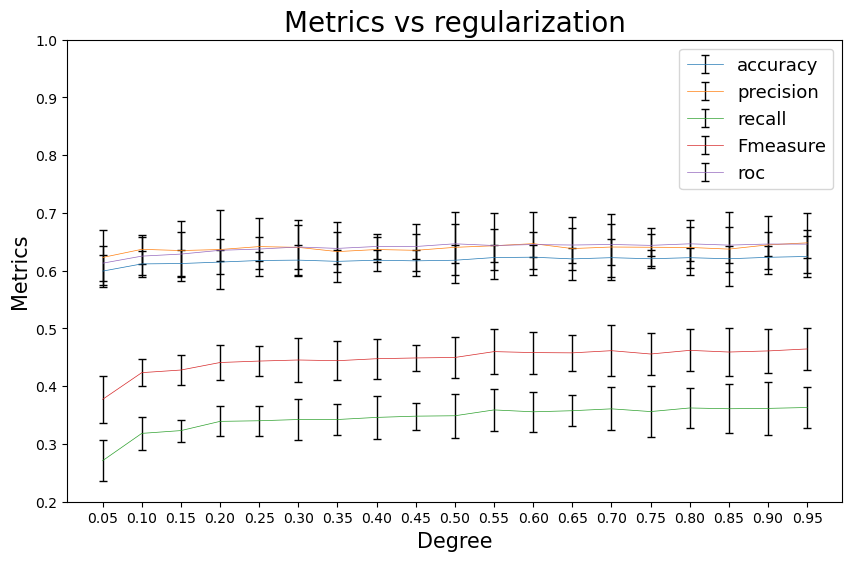

In [85]:
plt.figure(1,figsize=(10,6))

plt.title("Metrics vs regularization",fontsize=20)

plt.xlabel("Degree",fontsize=15)
plt.ylabel("Metrics",fontsize=15)

metrics=["accuracy","cost","precision","recall","Fmeasure","roc"]

plt.ylim(0.2,1.0)

for i in range(len(metrics)):
    if(i!=1):
        plt.errorbar(list((i+1)*0.05 for i in range(19)),result[:,i],yerr=result[:,6+i],capsize=3,ecolor="#000000",elinewidth=1.0,linewidth=0.5,label=metrics[i])

plt.legend(loc="upper right",fontsize=13)

z=plt.xticks(list((i+1)*0.05 for i in range(19)))

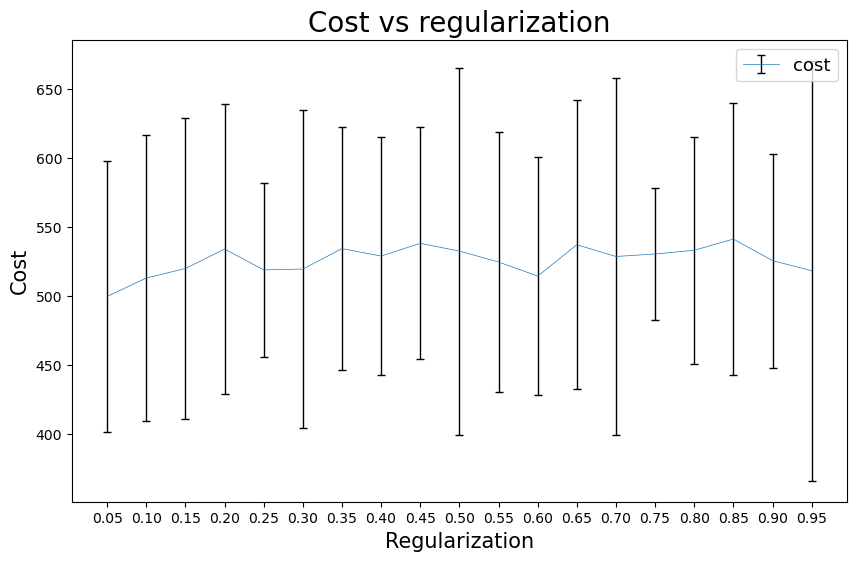

In [86]:
plt.figure(1,figsize=(10,6))

plt.title("Cost vs regularization",fontsize=20)

plt.xlabel("Regularization",fontsize=15)
plt.ylabel("Cost",fontsize=15)

metrics=["accuracy","cost","precision","recall","Fmeasure","roc"]


for i in range(len(metrics)):
    if(i==1):
        plt.errorbar(list((i+1)*0.05 for i in range(19)),result[:,i],yerr=result[:,6+i],capsize=3,ecolor="#000000",elinewidth=1.0,linewidth=0.5,label=metrics[i])

plt.legend(loc="upper right",fontsize=13)

z=plt.xticks(list((i+1)*0.05 for i in range(19)))

In [87]:
    
kf=KFold(n_splits=10,shuffle=True)

cont=0
    
for train,test in kf.split(dfeature,dClass):
    
    
    dfeature_train=dfeature.iloc[train,:]
    dfeature_test=dfeature.iloc[test,:]
    
    dClass_train=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
        
        
    model=LogisticRegression(C=0.9,n_jobs=-1)
        
    model.fit(dfeature_train,dClass_train)
        
    models[modelo].loc[cont,"accuracy"]=model.score(dfeature_test,dClass_test)
    models[modelo].loc[cont,"precision"]=precision_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"Fmeasure"]=f1_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"recall"]=recall_score(dClass_test,model.predict(dfeature_test))
    models[modelo].loc[cont,"roc"]=roc_auc_score(dClass_test,model.predict_proba(dfeature_test)[:,1])
        
    coff_matrix=confusion_matrix(dClass_test,model.predict(dfeature_test))
        
    models[modelo].loc[cont,"cost"]=0


    x,y,_=roc_curve(dClass_test,model.predict_proba(dfeature_test)[:,1])

    for i in range(x.size):
        models_roc[modelo].loc[i,"fpr"]=x[i]
        models_roc[modelo].loc[i,"tp"]=y[i]
    
    for i in range(2):
        for j in range(2):
            models[modelo].loc[cont,"cost"]+=coff_matrix[i,j]*cost_matrix[i,j]
                
            
    cont+=1

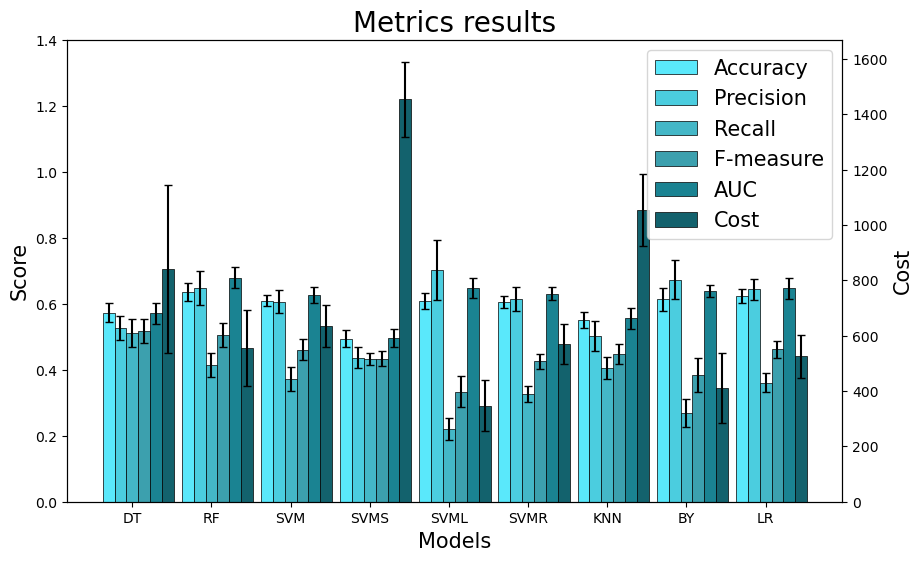

In [88]:
plt.figure(1,figsize=(10,6))

plt.title("Metrics results",fontsize=20)


metrics=["accuracy","precision","recall","Fmeasure","roc","cost"]
labels=["Accuracy","Precision","Recall","F-measure","AUC","Cost"]
modelos=list(models.keys())

posiciones=np.arange(0,len(modelos)*3,3)

color=["#5ae8fb","#4bcddf","#44b7c7","#3ca0ae","#1a8392","#13626d"]

cont=-2
cont2=0
for metrica in metrics:
    lista=[]
    errores=[]
    for modelo in modelos:
        lista.append(models[modelo][metrica].mean())
        errores.append(models[modelo][metrica].std())
    if(metrica!="cost"):
        plt.bar(posiciones+0.45*cont,lista,yerr=errores,capsize=3,ecolor="#000000",linewidth=0.5,label=labels[cont2],width=0.45,facecolor=color[cont2],edgecolor="#000000")
    cont+=1
    cont2+=1

plt.ylim(0.0,1.4)

plt.ylabel("Score",fontsize=15)
plt.xlabel("Models",fontsize=15)
axe=plt.gca()

h1,legend1=axe.get_legend_handles_labels()

plt.twinx()
cont=-2
cont2=0
for metrica in metrics:
    lista=[]
    errores=[]
    for modelo in modelos:
        lista.append(models[modelo][metrica].mean())
        errores.append(models[modelo][metrica].std())
    if(metrica=="cost"):
        plt.bar(posiciones+0.45*cont,lista,yerr=errores,capsize=3,ecolor="#000000",linewidth=0.5,label=labels[cont2],width=0.45,facecolor=color[cont2],edgecolor="#000000")
    cont+=1
    cont2+=1

axe=plt.gca()
h2,legend2=axe.get_legend_handles_labels()

plt.ylabel("Cost",fontsize=15)


plt.xticks(posiciones,modelos)

plt.legend(h1+h2,legend1+legend2,loc="upper right",fontsize=15)


plt.savefig("metrics_result.png",format="png",bbox_inches="tight")

In [95]:
for i in models:
    print("\n",i," & ")
    for m in metrics:
        print("$",(models[i].mean()).loc[m],r"\pm",(models[i].std()).loc[m],"$ & ",end="")


 DT  & 
$ 0.5733077722435231 \pm 0.02756164197669467 $ & $ 840.65 \pm 304.13315556806606 $ & $ 0.5263745454807477 \pm 0.03757918234584616 $ & $ 0.5112926987822602 \pm 0.04331883390771118 $ & $ 0.518022838634306 \pm 0.035950577664143286 $ & $ 0.570599187762997 \pm 0.03183158429689102 $ & 
 RF  & 
$ 0.6407845701795248 \pm 0.027163170036362188 $ & $ 541.0 \pm 114.49890829173874 $ & $ 0.6553147384863904 \pm 0.04973341379644725 $ & $ 0.4265882243529496 \pm 0.04471072170288875 $ & $ 0.5150223755364474 \pm 0.03659407740542637 $ & $ 0.6798908717071778 \pm 0.0236105057125463 $ & 
 SVM  & 
$ 0.6094734296054753 \pm 0.017296644426089035 $ & $ 633.5 \pm 75.7792847683323 $ & $ 0.6057890413025493 \pm 0.034967140331567864 $ & $ 0.3733216197433933 \pm 0.036405865593748726 $ & $ 0.461071453658964 \pm 0.03184420188977284 $ & $ 0.6265377200981509 \pm 0.02348274118056354 $ & 
 SVMS  & 
$ 0.4941645465295446 \pm 0.025039793096907292 $ & $ 1453.6 \pm 135.81539758886774 $ & $ 0.4368079029238373 \pm 0.03214962

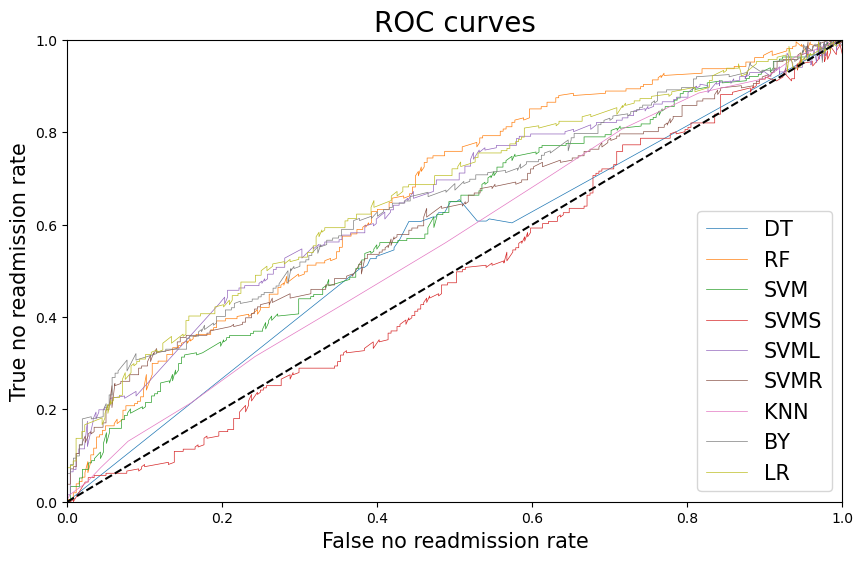

In [96]:
plt.figure(1,figsize=(10,6))

plt.title("ROC curves",fontsize=20)


metrics=["accuracy","precision","recall","Fmeasure","roc","cost"]
labels=["Accuracy","Precision","Recall","F-measure","AUC","Cost"]
modelos=list(models.keys())

posiciones=np.arange(0,len(modelos)*3,3)

#color=["#5ae8fb","#4bcddf","#44b7c7","#3ca0ae","#1a8392","#13626d"]

cont2=0
for modelo in models_roc.keys():
    models_roc[modelo].sort_values(by="fpr",ascending=False,axis=0,inplace=True)
    plt.plot(models_roc[modelo].loc[:,"fpr"],models_roc[modelo].loc[:,"tp"],linewidth=0.5,label=modelos[cont2])
    cont2+=1
plt.plot([0.0,1.0],[0.0,1.0],linestyle="--",color="#000000")

plt.ylim(0.0,1.0)

plt.ylabel("True no readmission rate",fontsize=15)
plt.xlabel("False no readmission rate",fontsize=15)
axe=plt.gca()

h1,legend1=axe.get_legend_handles_labels()


plt.xlim(0.0,1.0)
plt.legend(h1,legend1,loc="lower right",fontsize=15)


#plt.savefig("ROC_curve.png",format="png",bbox_inches="tight")